In [22]:
import keras
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 6

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from tqdm.notebook import tqdm

from scipy import stats

from sklearn import datasets

import sys 
sys.path.append("../")
from KDG import KDG

import openml

# Experiment Parameters

In [23]:
max_depth = 10
n_estimators = 2
num_trials = 20

# Data Generation

# Construct & Train Network

## Keurnal Networks

In [24]:
def train_AKN(X, y):
    X_transform, X, y_transform, y = train_test_split(X, y, test_size = .9)
    #X_transform, y_transform = X, y
    rfc = RandomForestClassifier(n_estimators = n_estimators, 
                                   max_depth = max_depth)

    rfc.fit(X, y)

    predicted_leaf_ids_across_trees = [np.unique(tree.apply(X), return_inverse = True)[1] for tree_idx, tree in enumerate(rfc.estimators_)]

    return KDG().fit(X, y, predicted_leaf_ids_across_trees)

In [25]:
def get_ece(predicted_posterior, y):
    hists = []
    hists_hat = []
    amts = []
    num_bins = 40
    eces_across_y_vals = []
    for y_val in np.unique(y):
        for i in range(num_bins):
            prop = i*1./num_bins
            inds = np.where((predicted_posterior[:, y_val] >= prop) & (predicted_posterior[:, y_val] <= prop+1./num_bins))[0]
            amts.append(len(inds))
            if len(inds) > 0:
                hists.append(len(np.where(y[inds] == y_val)[0])*1./len(inds))
                hists_hat.append(np.mean(predicted_posterior[inds, y_val]))
            else:
                hists.append(prop)
                hists_hat.append(prop + 0.5/num_bins)
        eces_across_y_vals.append(np.dot(np.abs(np.array(hists) - np.array(hists_hat)), amts) / np.sum(amts))
        return np.mean(eces_across_y_vals)

In [27]:
def get_brier(predicted_posterior, y):
    brier_across_y_vals = []
    for y_val in np.unique(y):
        brier_across_y_vals.append(np.nanmean((predicted_posterior[:, y_val] - (y == y_val).astype('int'))**2))
    return np.mean(brier_across_y_vals)

In [28]:
def get_network_y_proba(X, y, n, X_test):
    random_indices = np.random.choice(len(X), int(n), replace = False)
    X, y = X[random_indices], y[random_indices]
    rfc = RandomForestClassifier(n_estimators = n_estimators, 
                                   max_depth = max_depth)

    rfc.fit(X, y)
    return rfc.predict_proba(X_test)
    

def get_KDE_y_proba(X, y, n, X_test):
    random_indices = np.random.choice(len(X), int(n), replace = False)
    X, y = X[random_indices], y[random_indices]
    kdg = train_AKN(X, y)
    y_proba_unnormalized = kdg.predict_proba(X_test, pooling = "polytope")

    y_proba = y_proba_unnormalized.copy()
    for y_val in range(np.shape(y_proba)[1]):
        y_proba[:, y_val] /= np.sum(y_proba_unnormalized, axis = 1)
        
    return y_proba

In [29]:
def clipped_mean(ra, low = 25, high = 75):
    ra = np.array(ra)
    lower_val = np.nanpercentile(ra, low)
    higher_val = np.nanpercentile(ra, high)
    return np.mean(ra[np.where((ra >= lower_val) & (ra <= higher_val))[0]])

Skipping Dataset 0
Dataset Num = 1
N = 107
D = 38



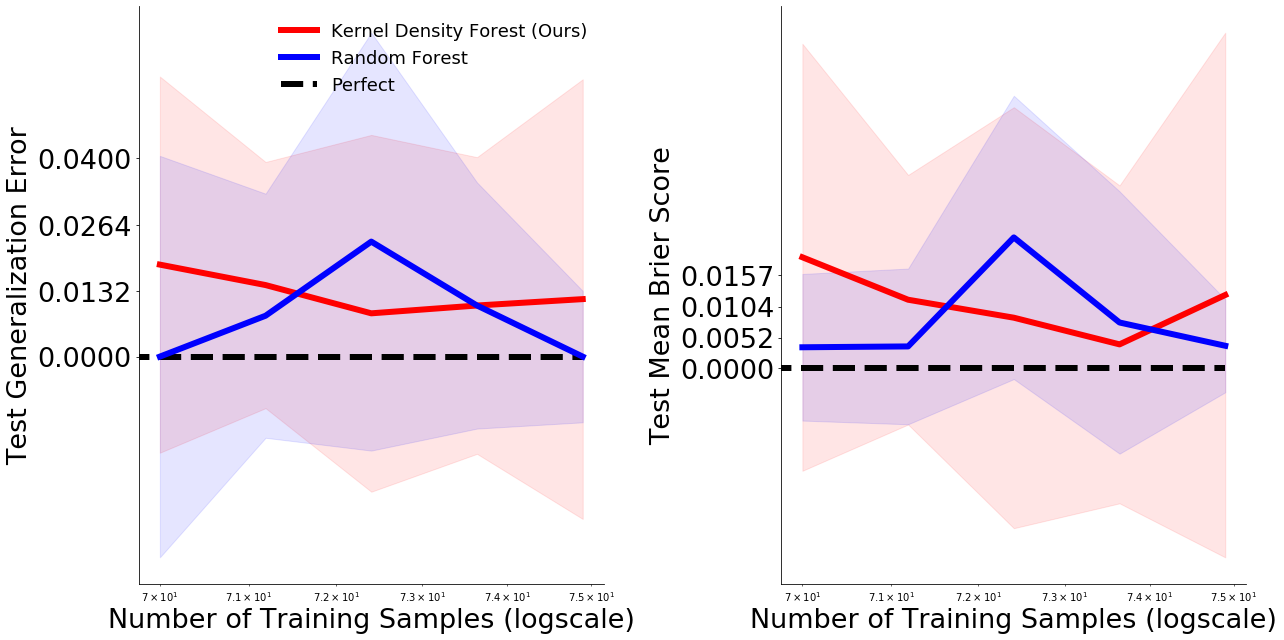

Dataset Num = 2
N = 107
D = 38




Skipping Dataset 2


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

Dataset Num = 3
N = 3196
D = 36



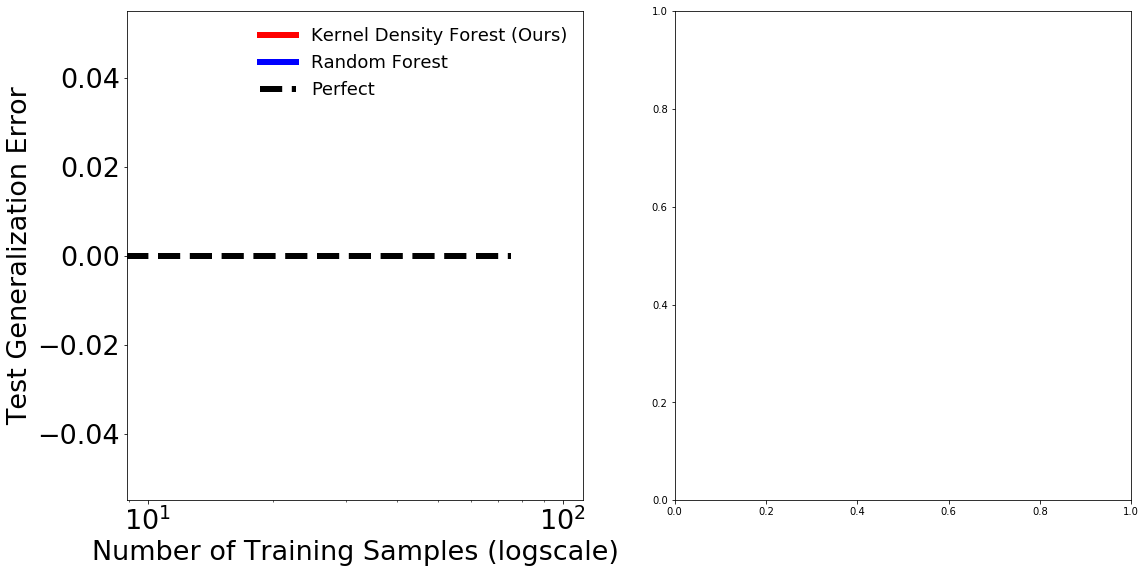

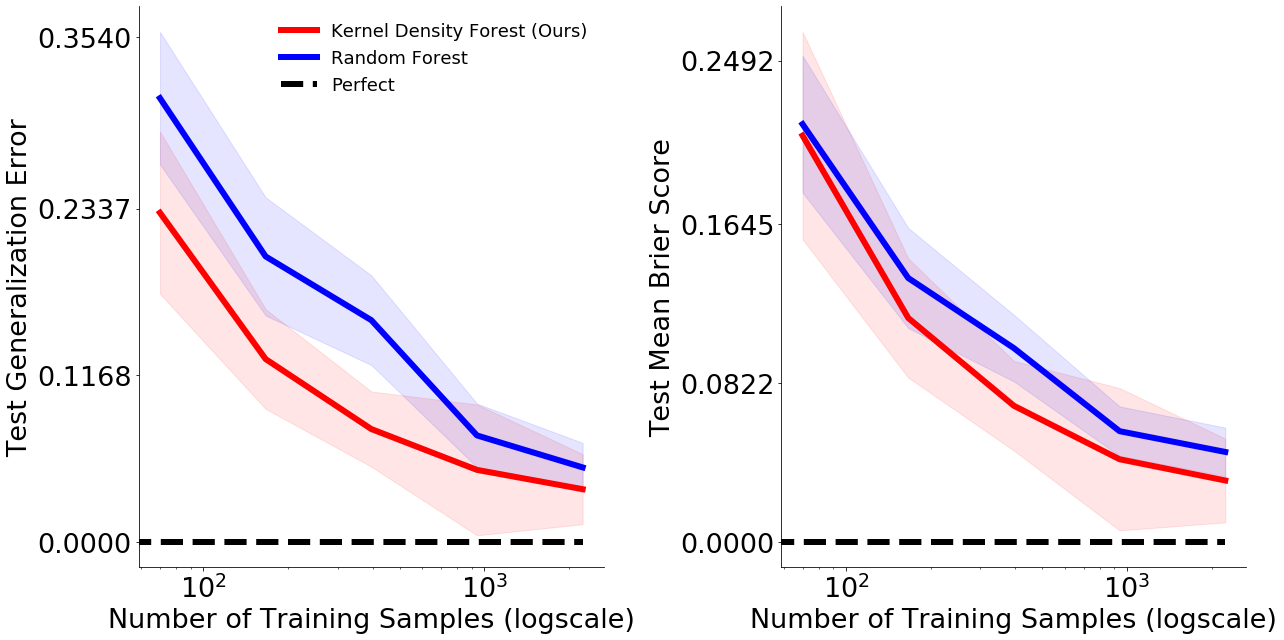

Dataset Num = 4
N = 57
D = 16




Skipping Dataset 4


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

Dataset Num = 5
N = 289
D = 279




Skipping Dataset 5
Dataset Num = 6
N = 1555
D = 16



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

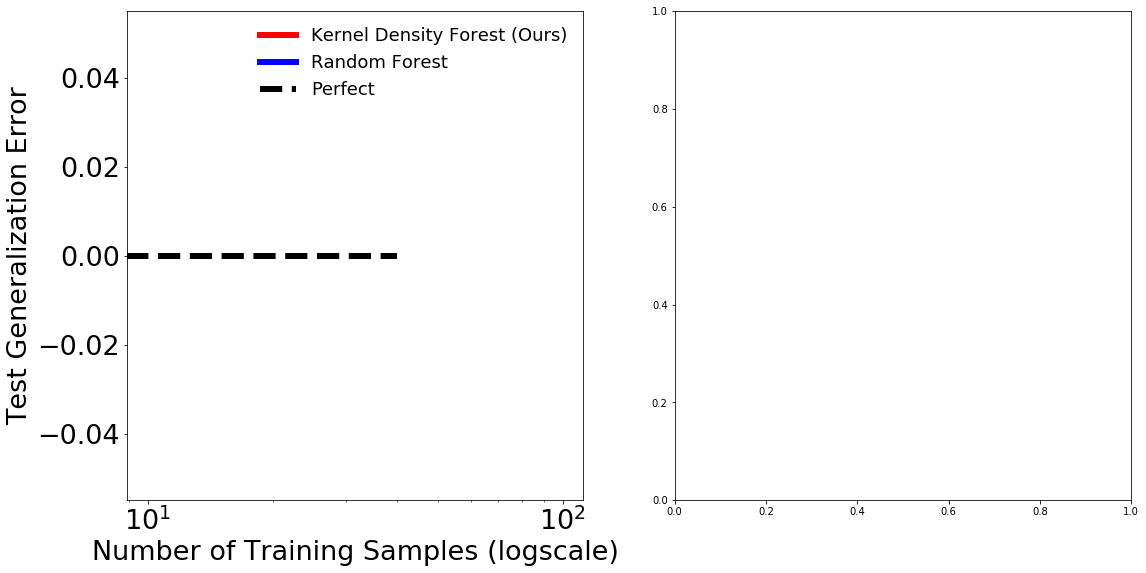

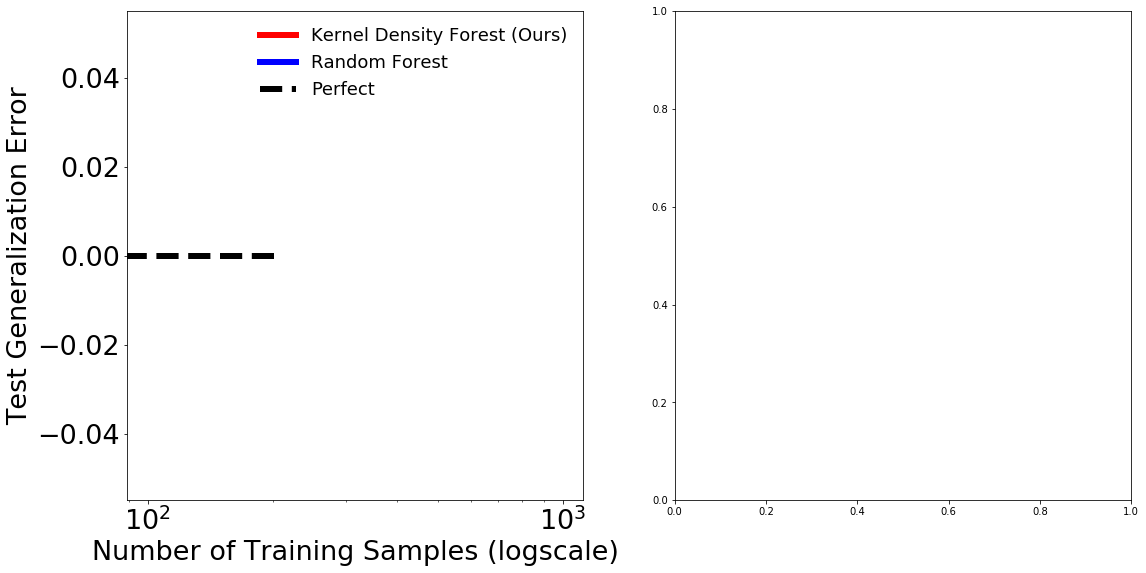

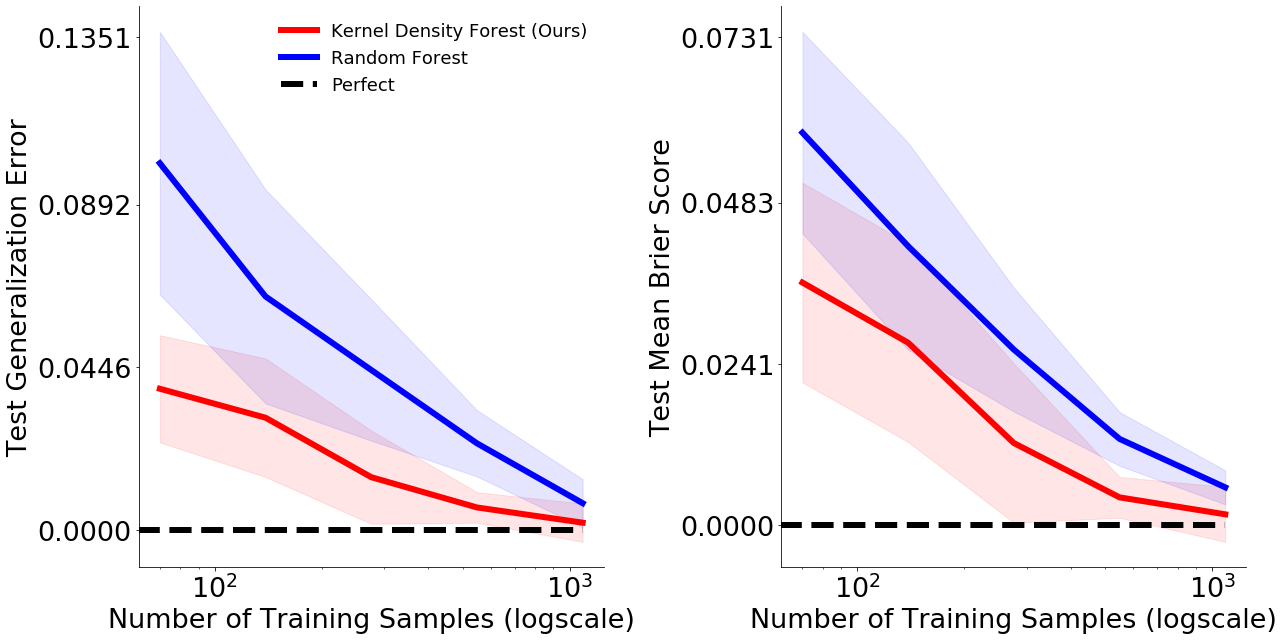

Dataset Num = 7
N = 2
D = 69




Skipping Dataset 7
Skipping Dataset 8
Dataset Num = 9
N = 3
D = 25



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

Skipping Dataset 9
Dataset Num = 10
N = 83
D = 18



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho


Skipping Dataset 10
Dataset Num = 11
N = 337
D = 4



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in double_scalars


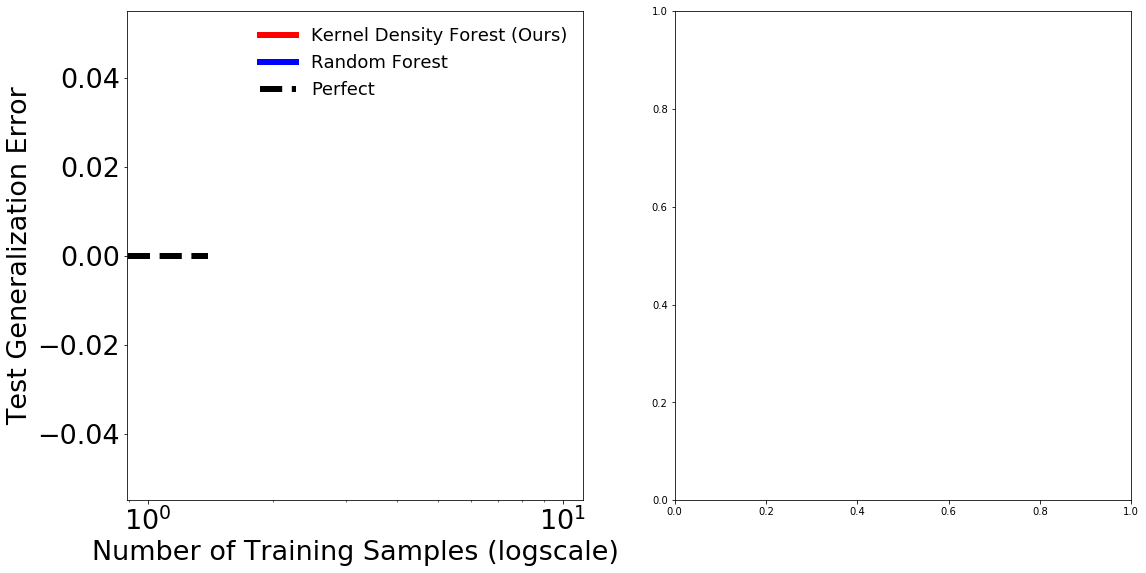

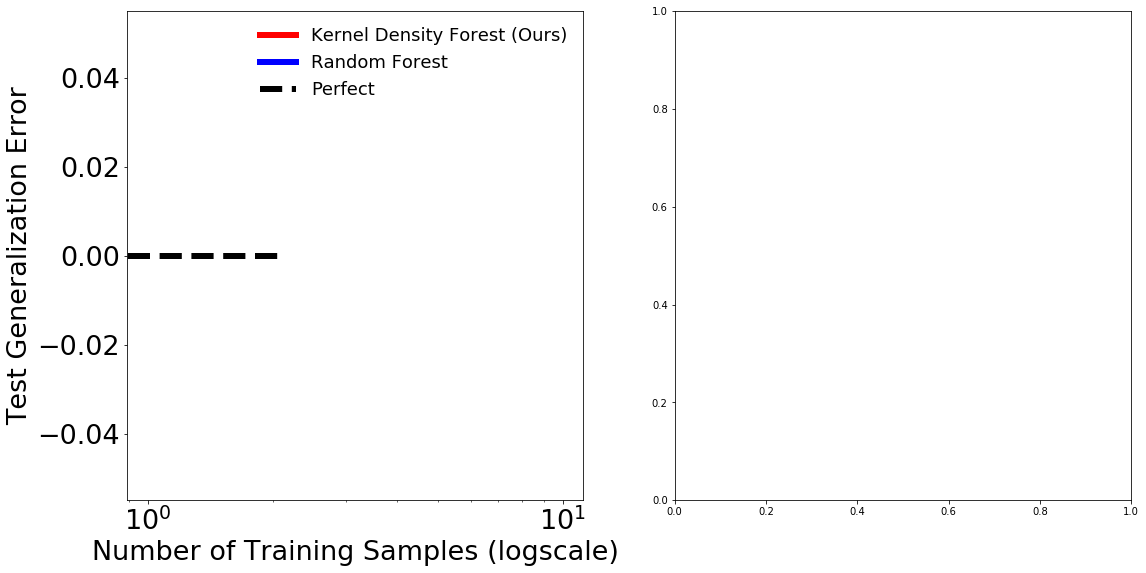

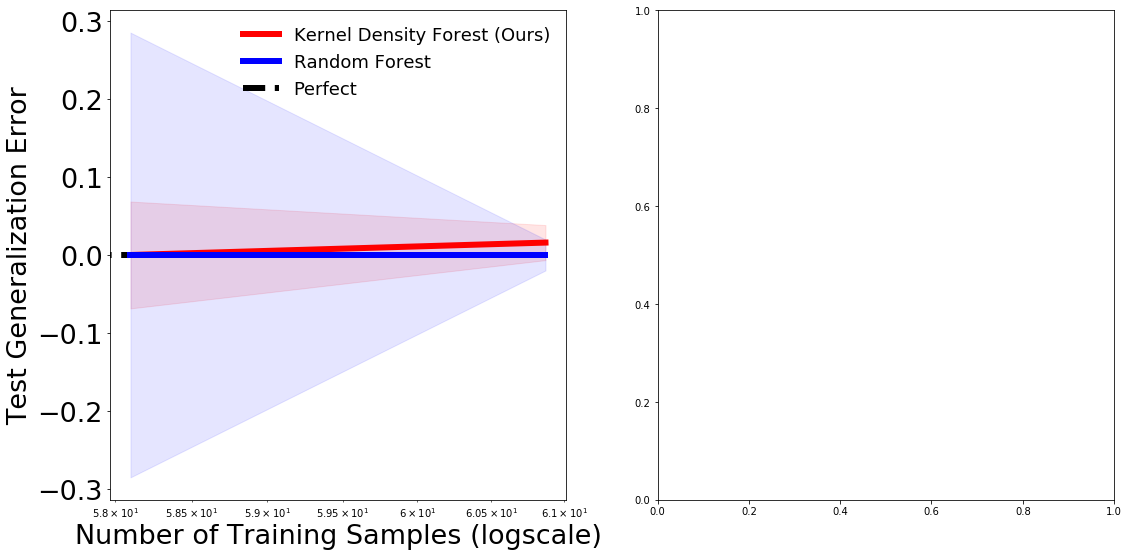

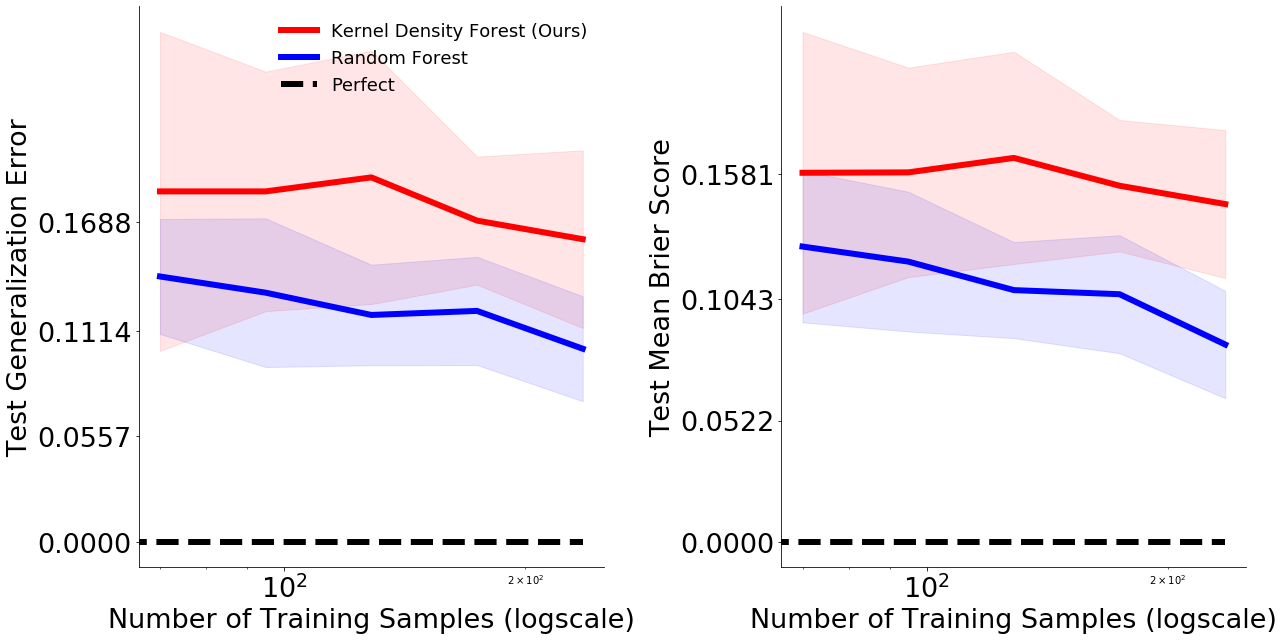

Dataset Num = 12
N = 400
D = 216



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-p

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-p

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.loca

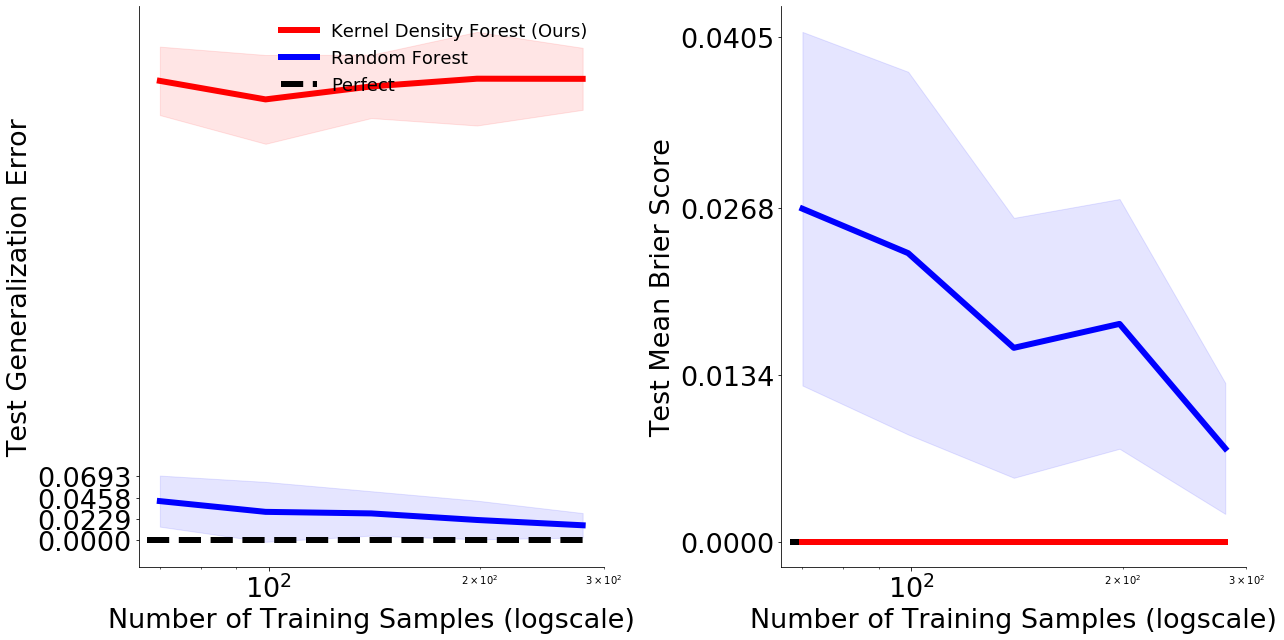

Dataset Num = 13
N = 286
D = 9



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho


Skipping Dataset 13
Dataset Num = 14
N = 400
D = 76



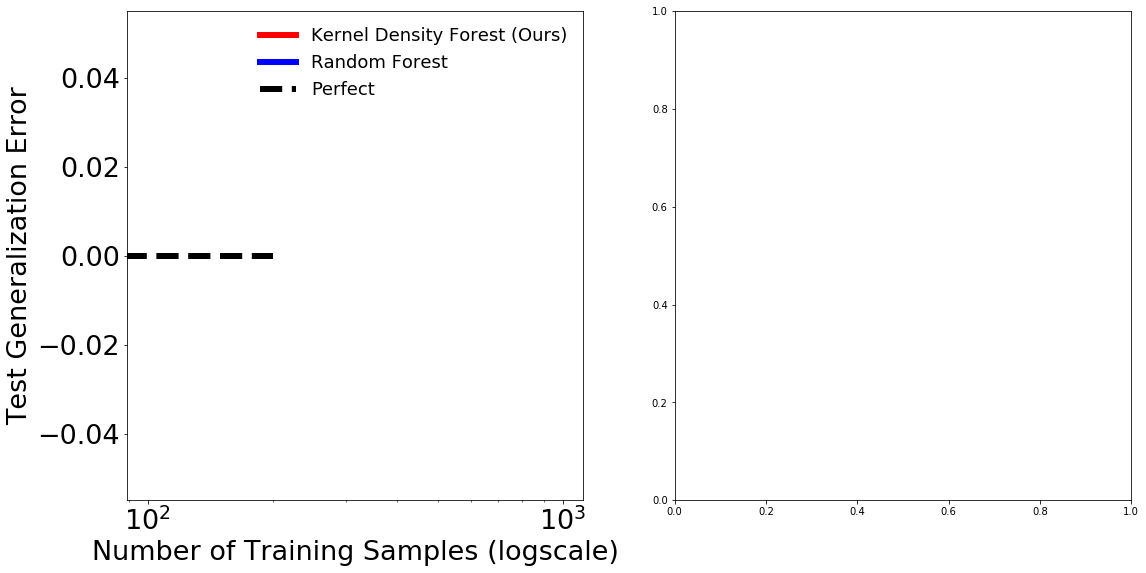

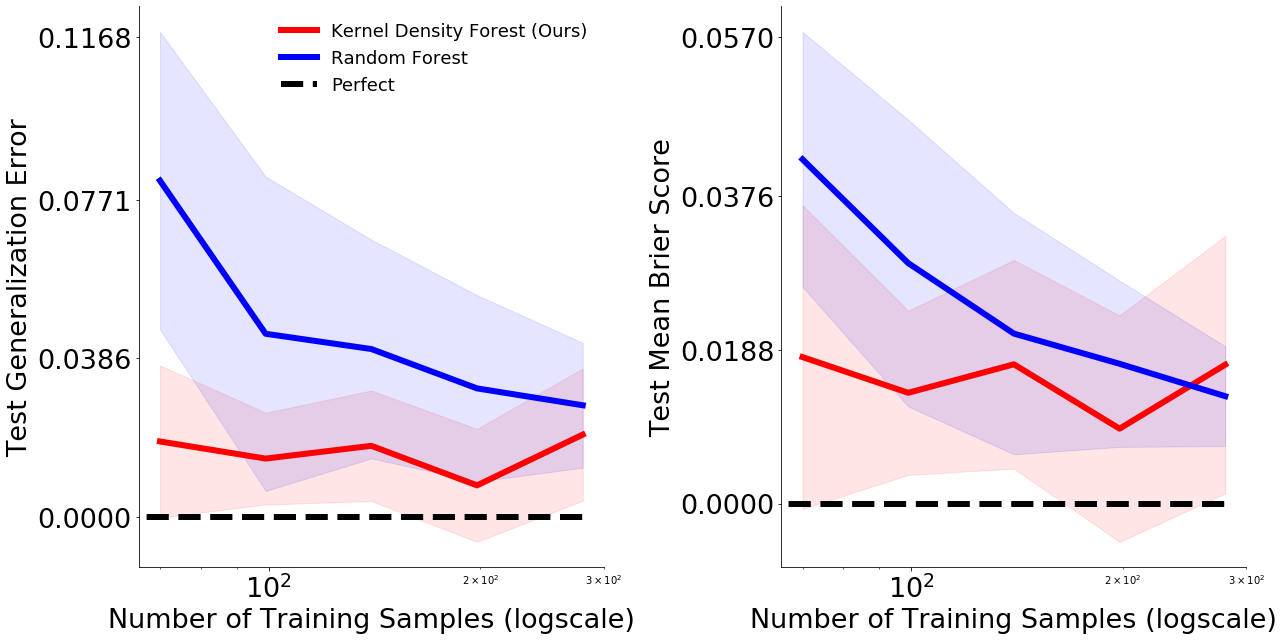

Dataset Num = 15
N = 699
D = 9




Skipping Dataset 15
Dataset Num = 16
N = 400
D = 64



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

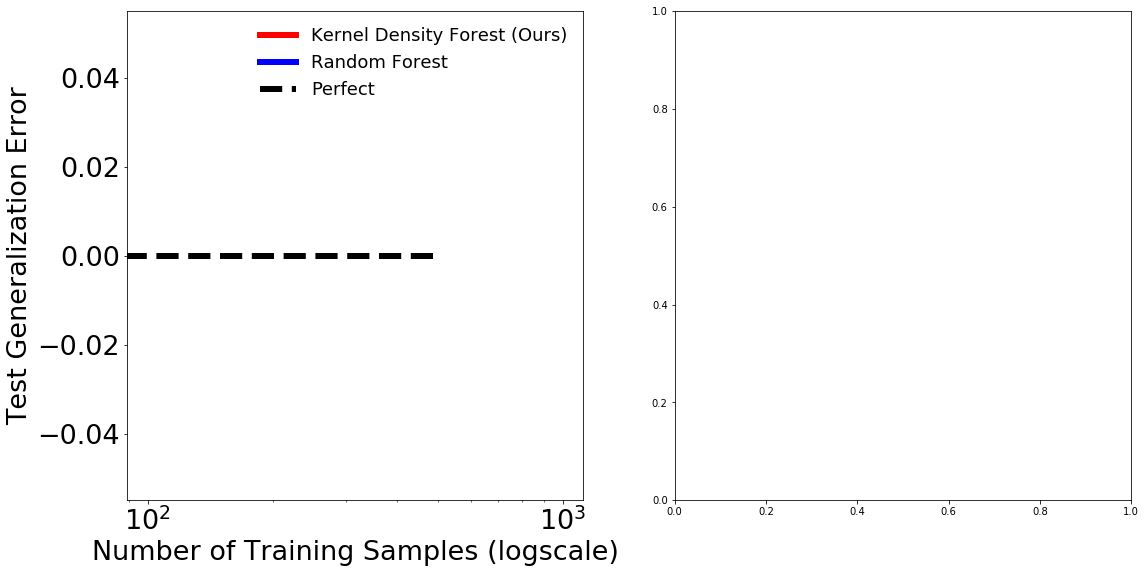

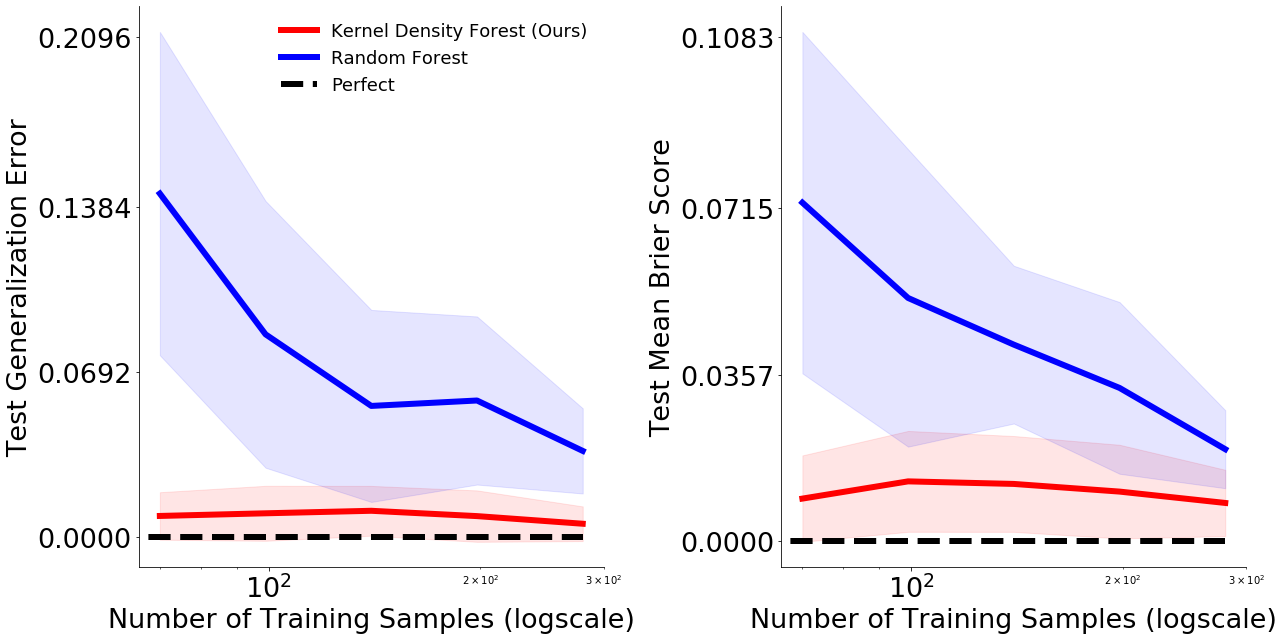

Dataset Num = 17
N = 29
D = 11




Skipping Dataset 17
Dataset Num = 18
N = 400
D = 6



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

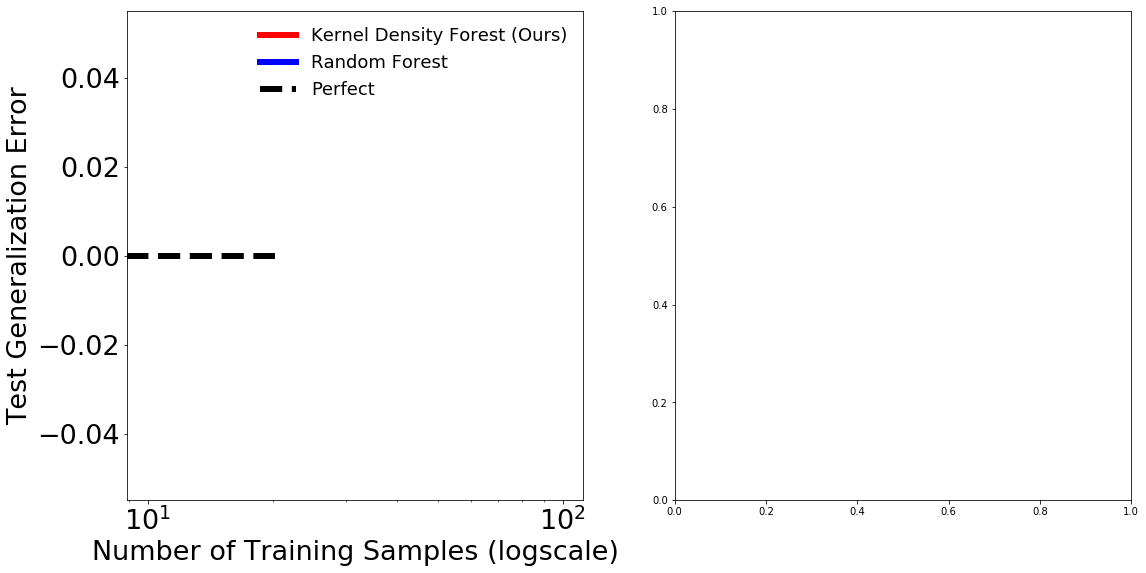

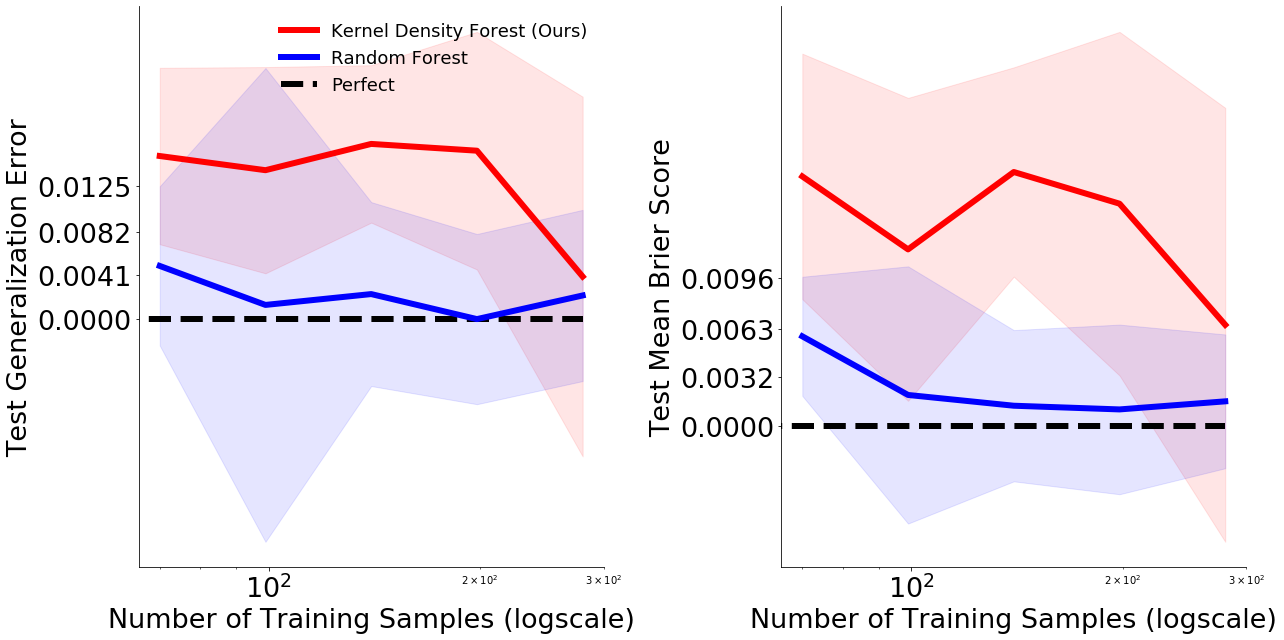

Dataset Num = 19
N = 29
D = 11




Skipping Dataset 19


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

Dataset Num = 20
N = 400
D = 240



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWa

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWa

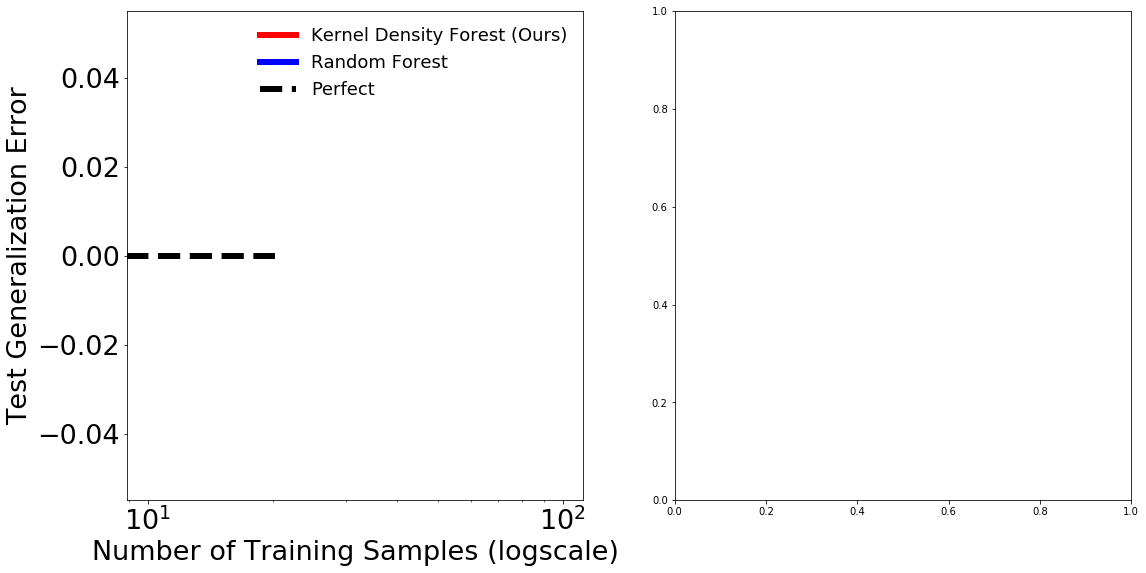

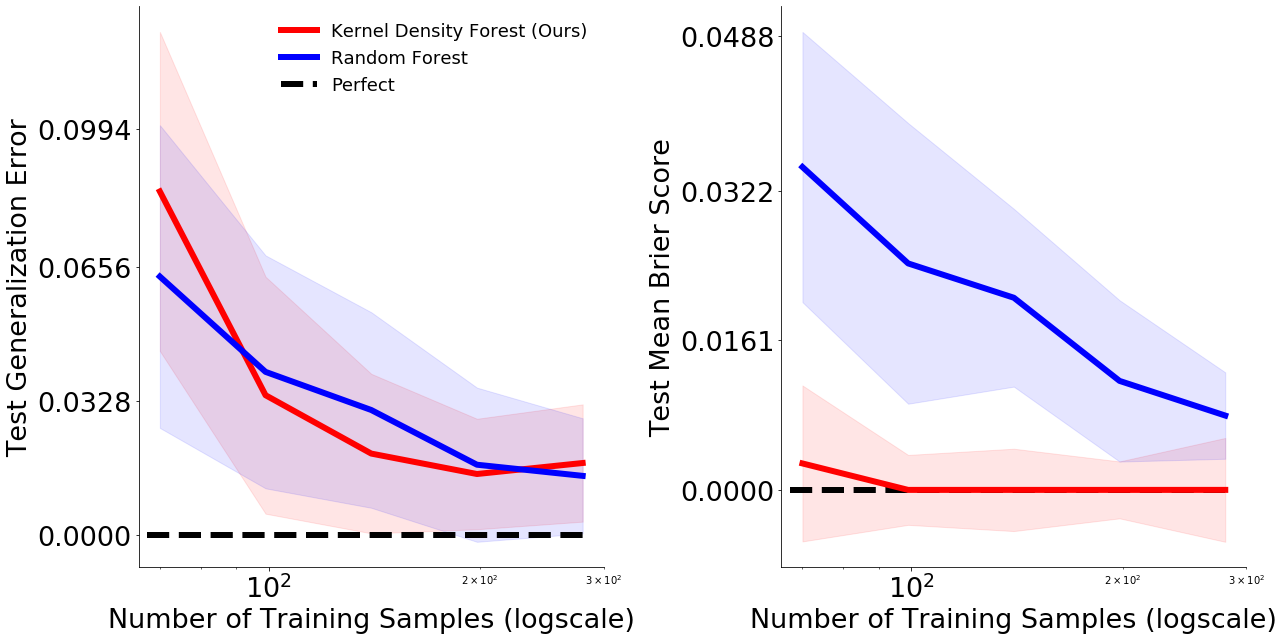

Dataset Num = 21
N = 1594
D = 6



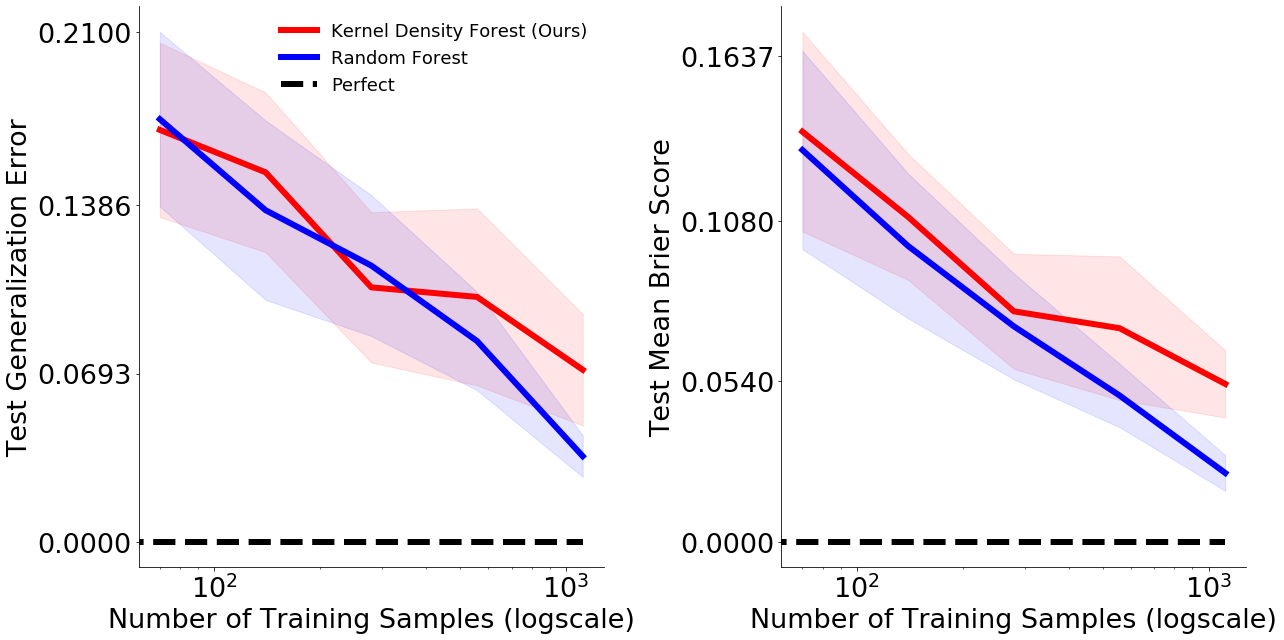

Dataset Num = 22
N = 400
D = 47



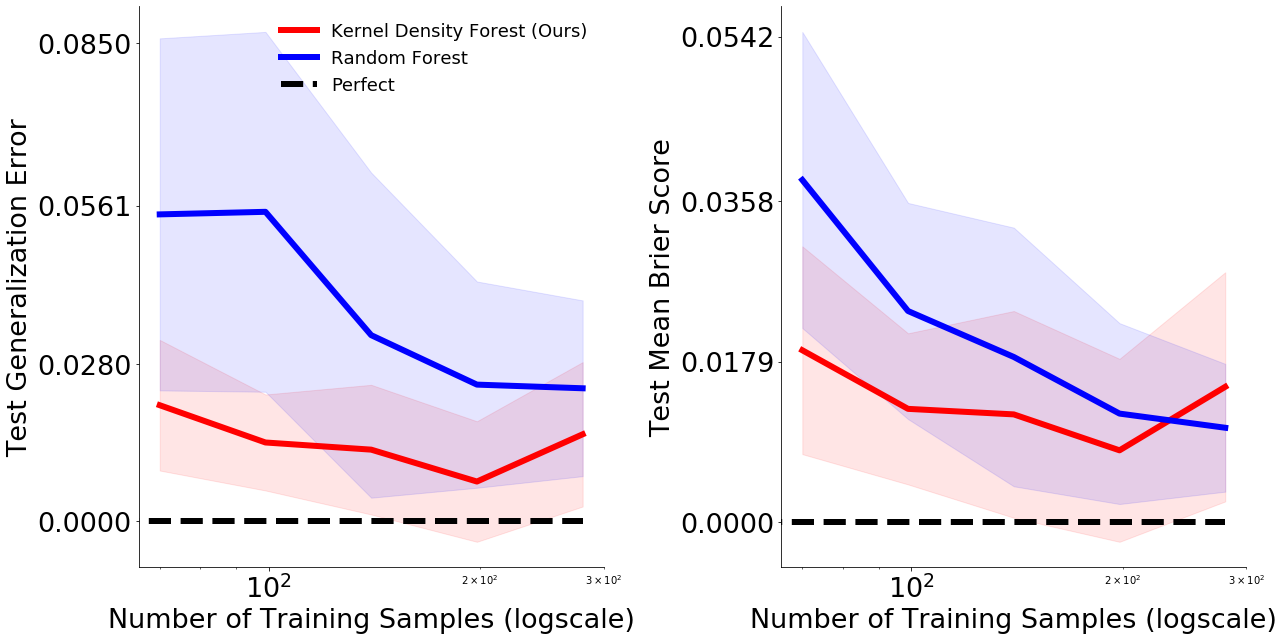

Dataset Num = 23
N = 962
D = 9



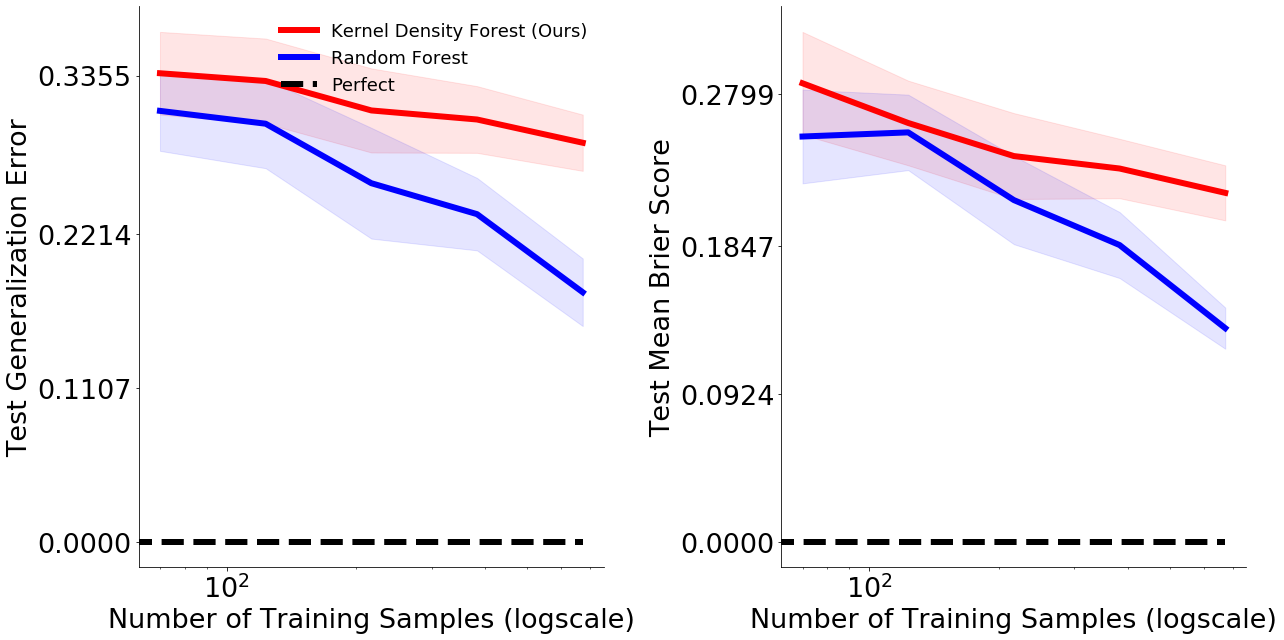

Dataset Num = 24
N = 8124
D = 22




Skipping Dataset 24


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

Dataset Num = 25
N = 368
D = 26




Skipping Dataset 25
Dataset Num = 26
N = 4322
D = 8



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in double_scalars
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in double_scalars
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in double_scalars
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in double_scalars



Skipping Dataset 26
Dataset Num = 27
N = 368
D = 22



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:106: RuntimeWarning: invalid value encountered in double_scalars


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

Skipping Dataset 27
Dataset Num = 28
N = 1125
D = 64



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide


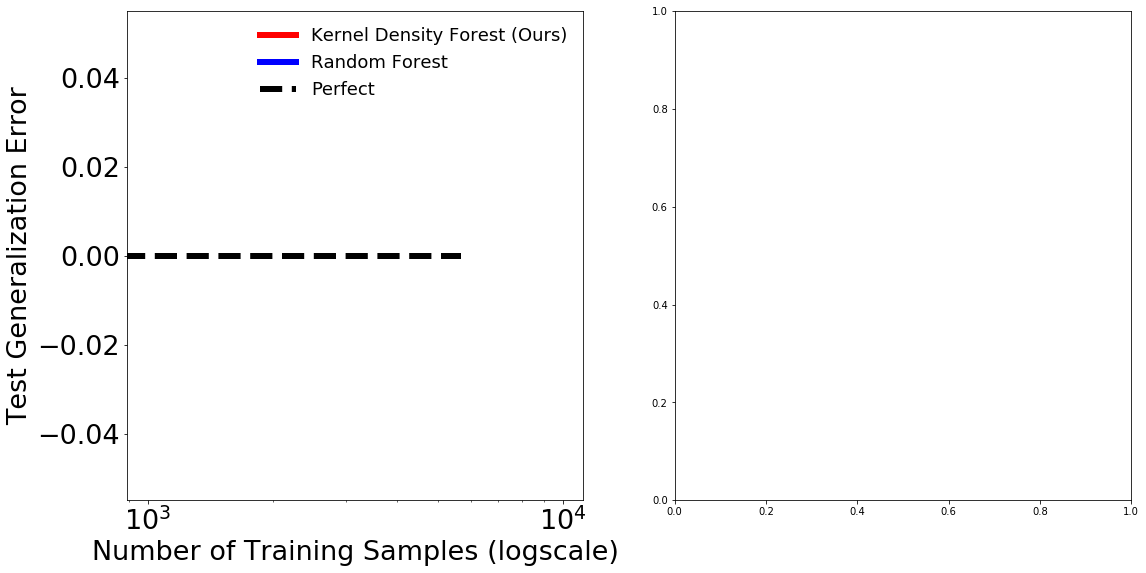

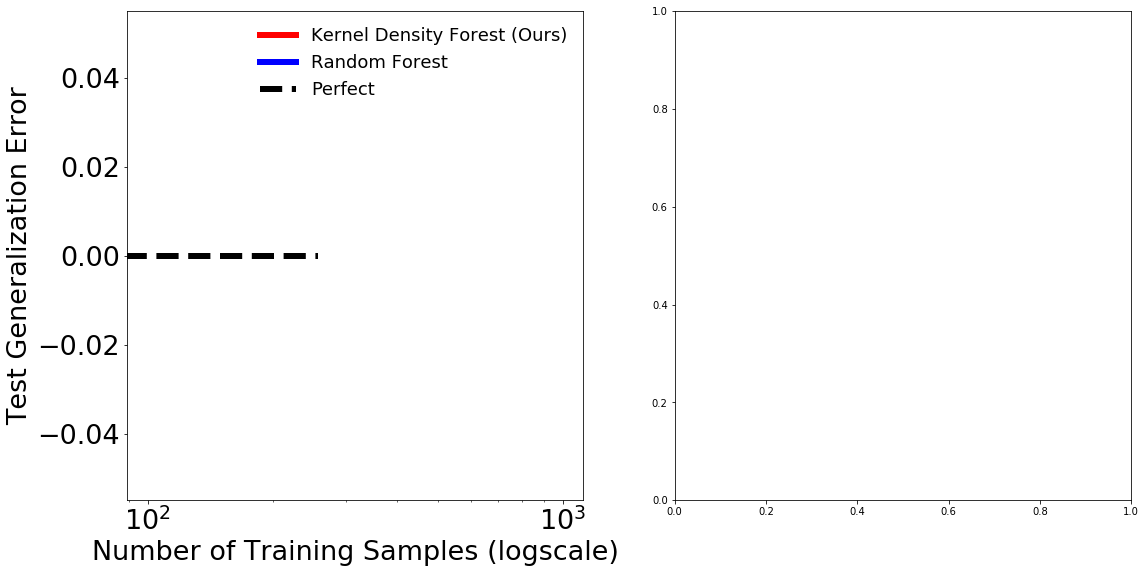

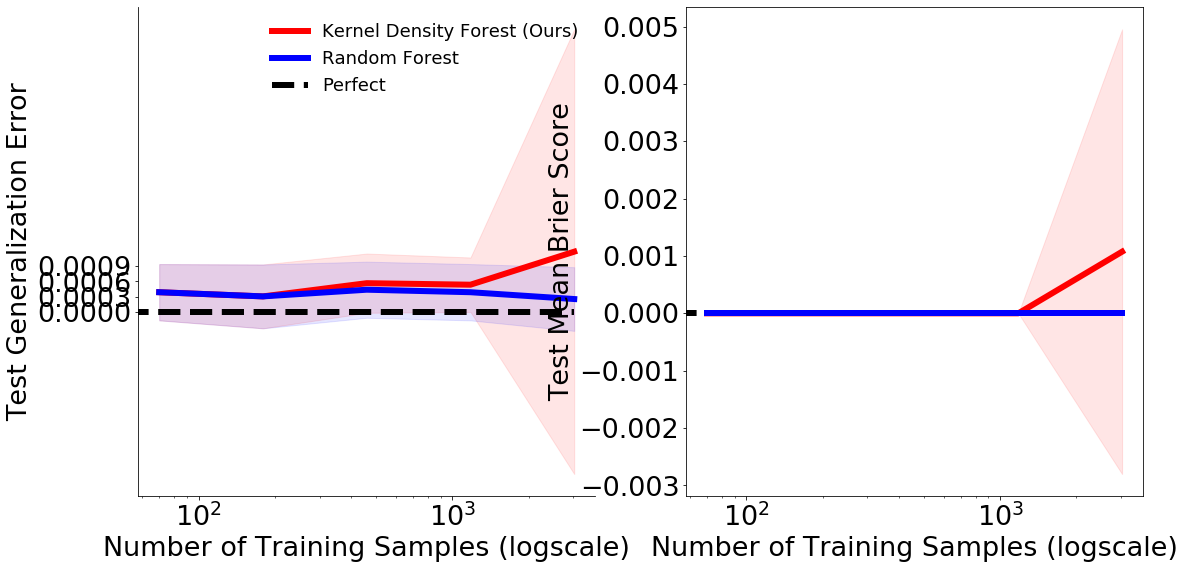

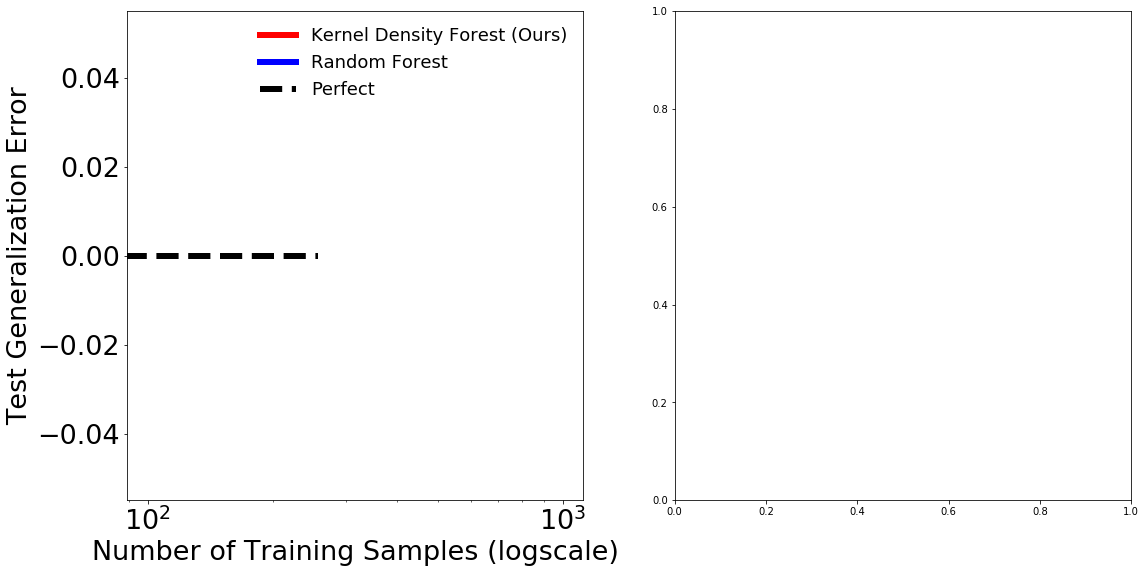

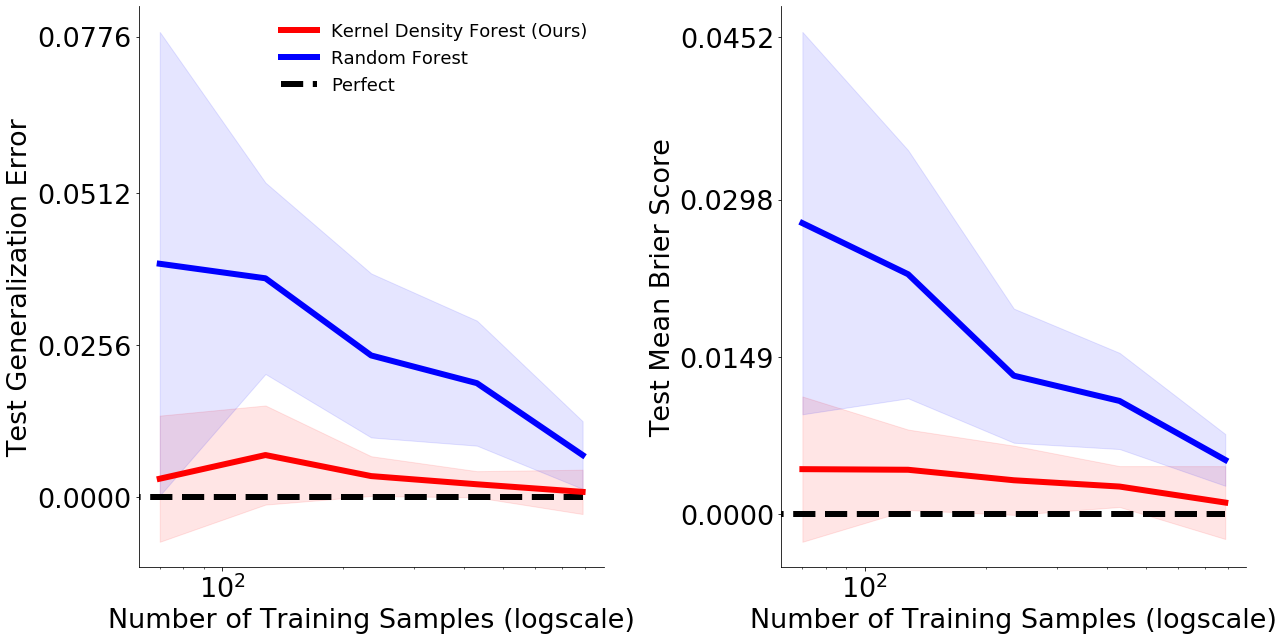

Dataset Num = 29
N = 690
D = 15




Skipping Dataset 29
Dataset Num = 30
N = 5242
D = 10



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWa

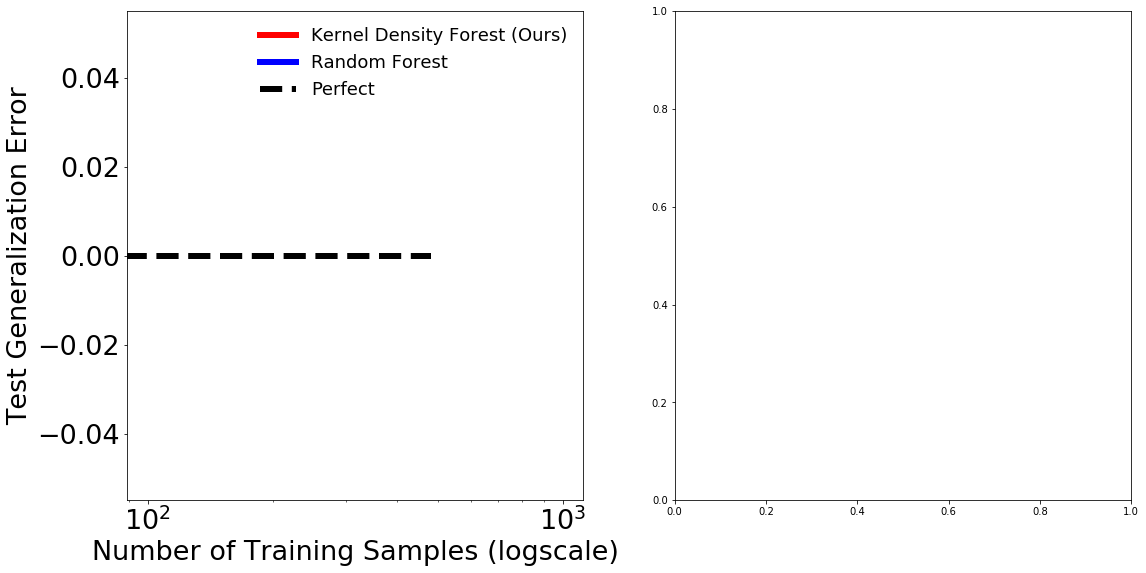

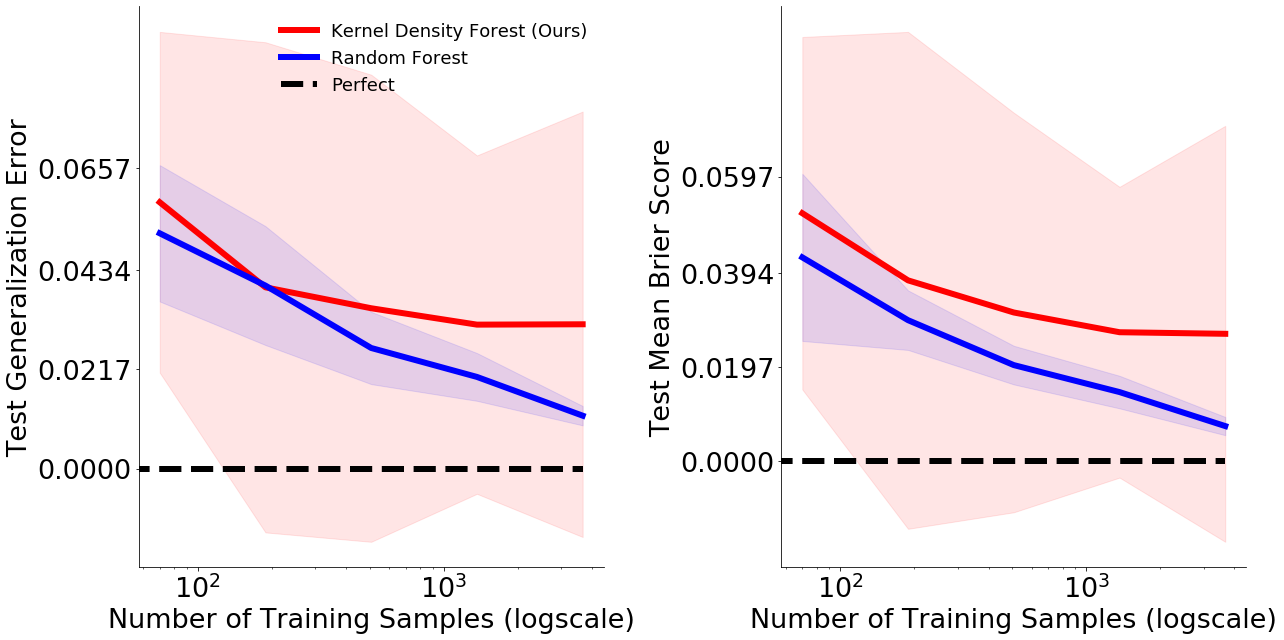

Dataset Num = 31
N = 1000
D = 20



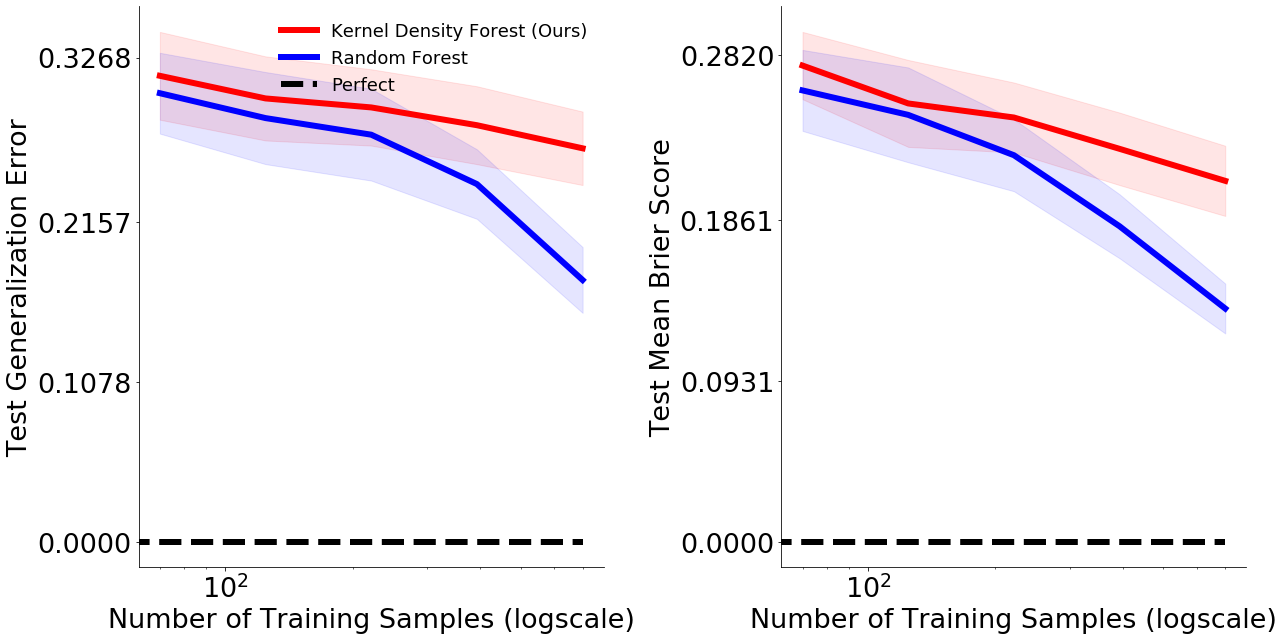

Dataset Num = 32
N = 2286
D = 16



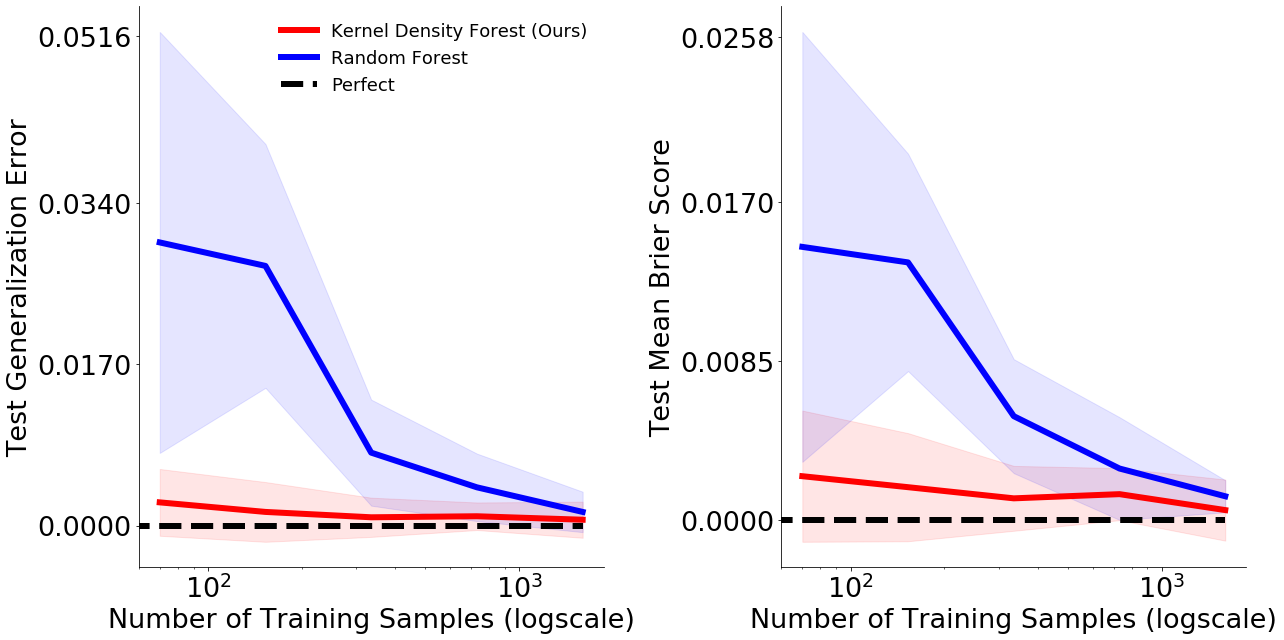

Dataset Num = 33
N = 540
D = 38




Skipping Dataset 33
Dataset Num = 34
N = 66
D = 8



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho


Skipping Dataset 34
Dataset Num = 35
N = 173
D = 34



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: divide by zero encountered in double_scalars
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encounte

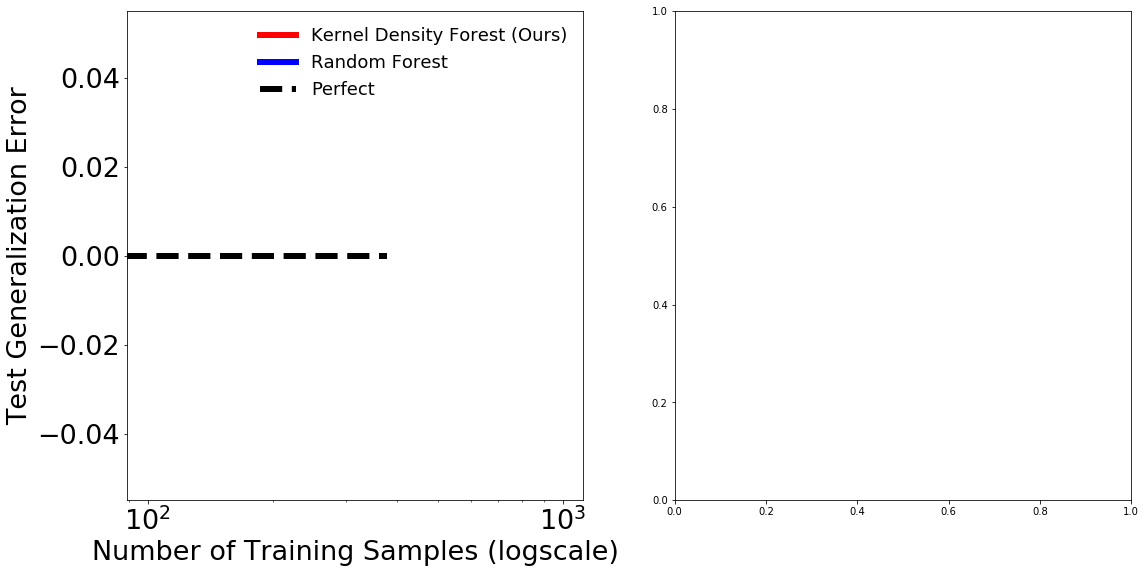

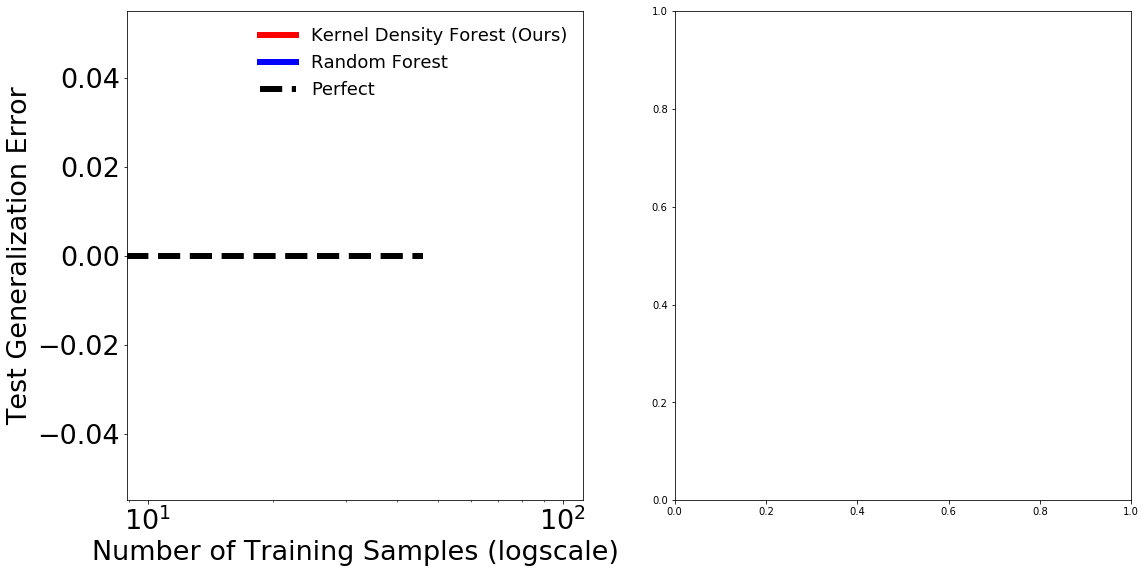

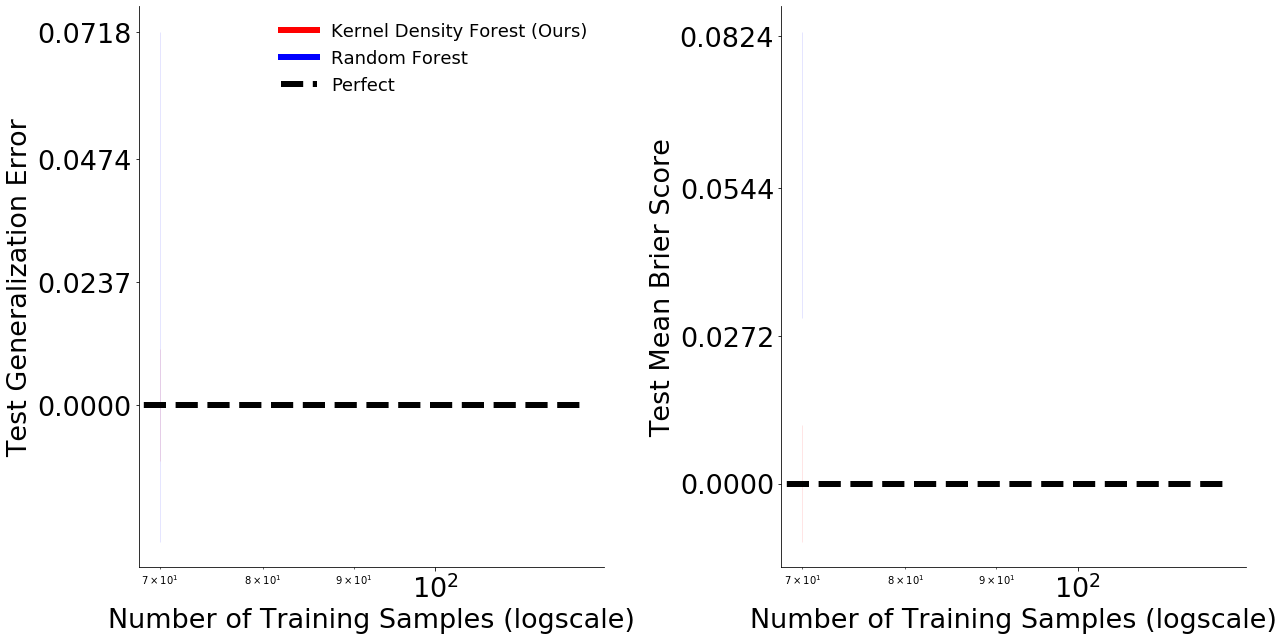

Dataset Num = 36
N = 660
D = 19



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in double_scalars
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in double_scalars
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in double_scalars
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in double_scalars


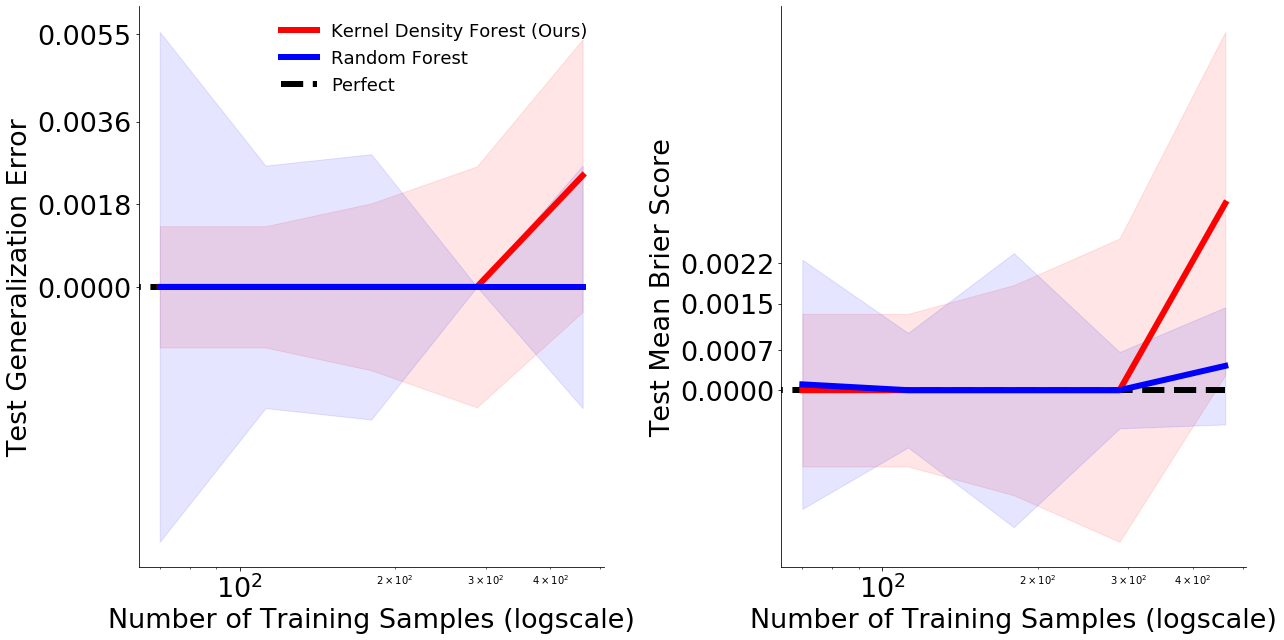

Dataset Num = 37
N = 768
D = 8



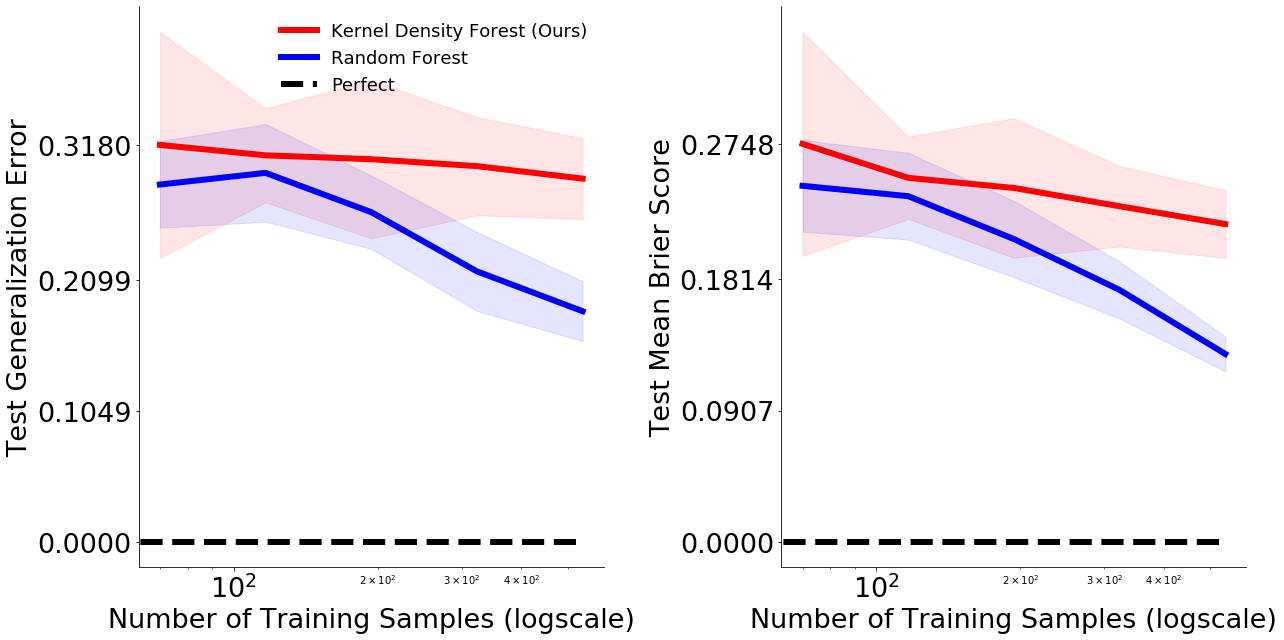

Dataset Num = 38
N = 220
D = 7



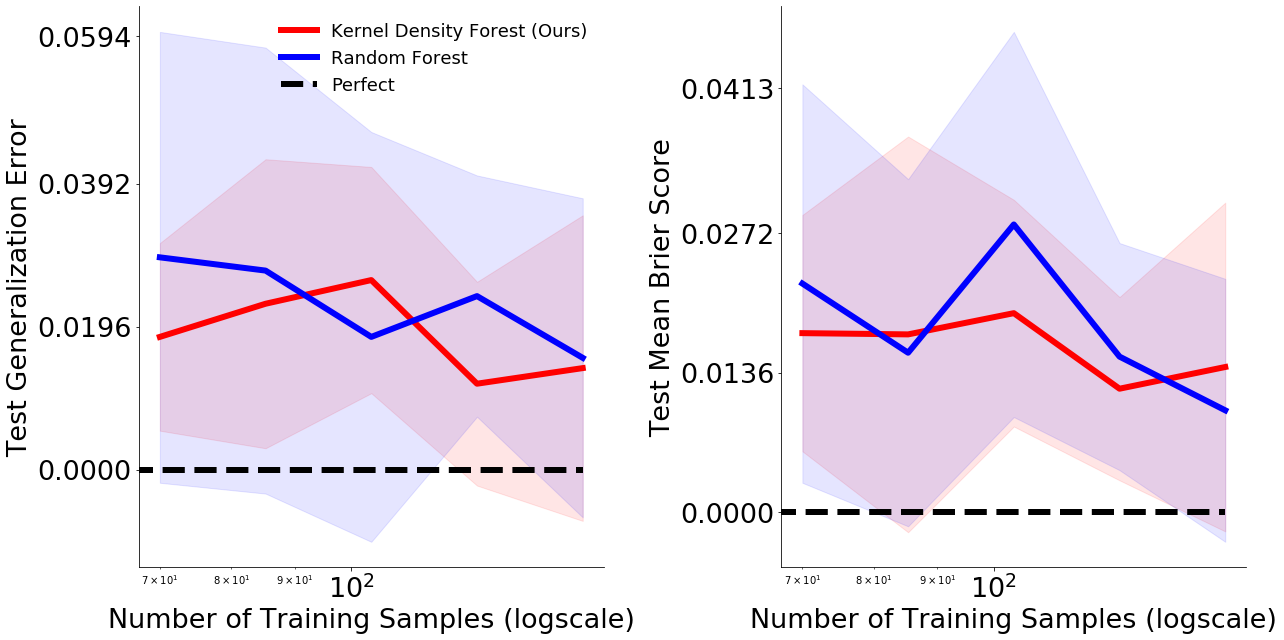

Dataset Num = 39
N = 208
D = 60



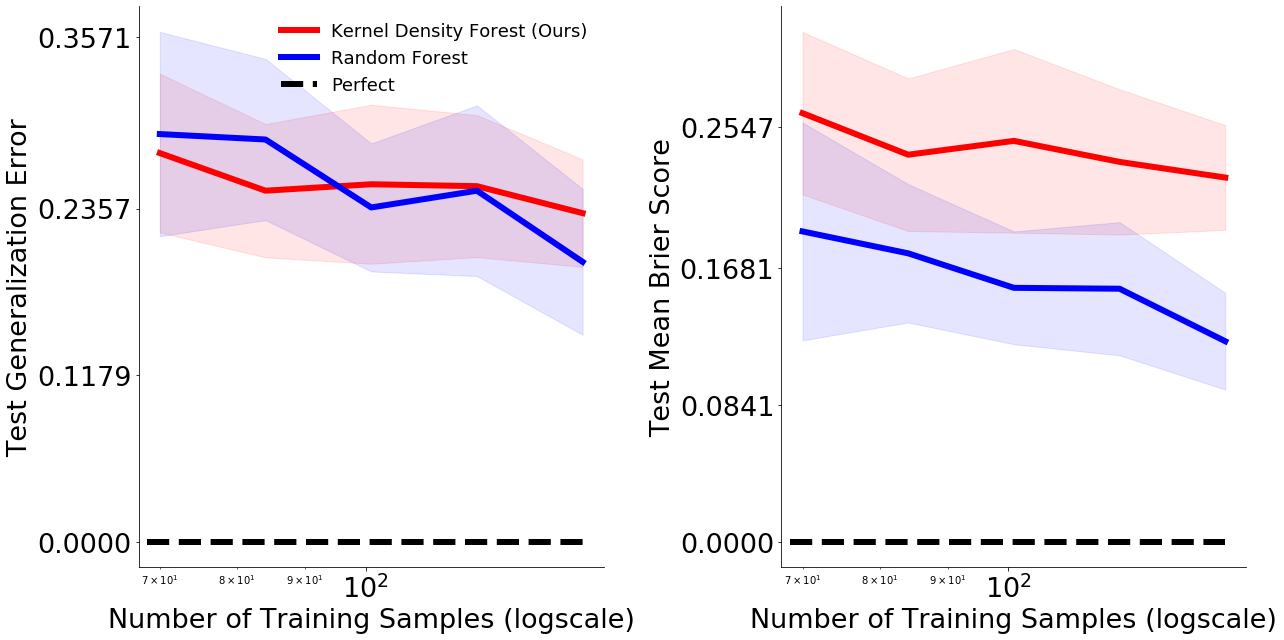

Dataset Num = 40
N = 146
D = 9



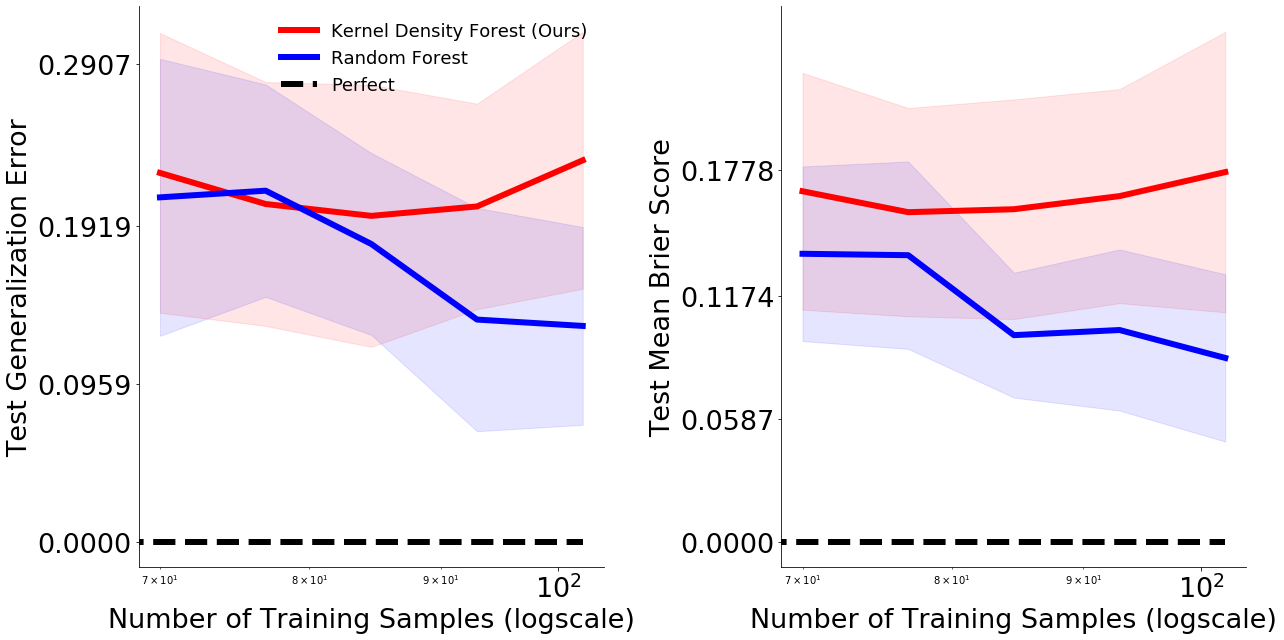

Dataset Num = 41
N = 40
D = 35



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho


Skipping Dataset 41
Dataset Num = 42
N = 306
D = 3



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in double_scalars


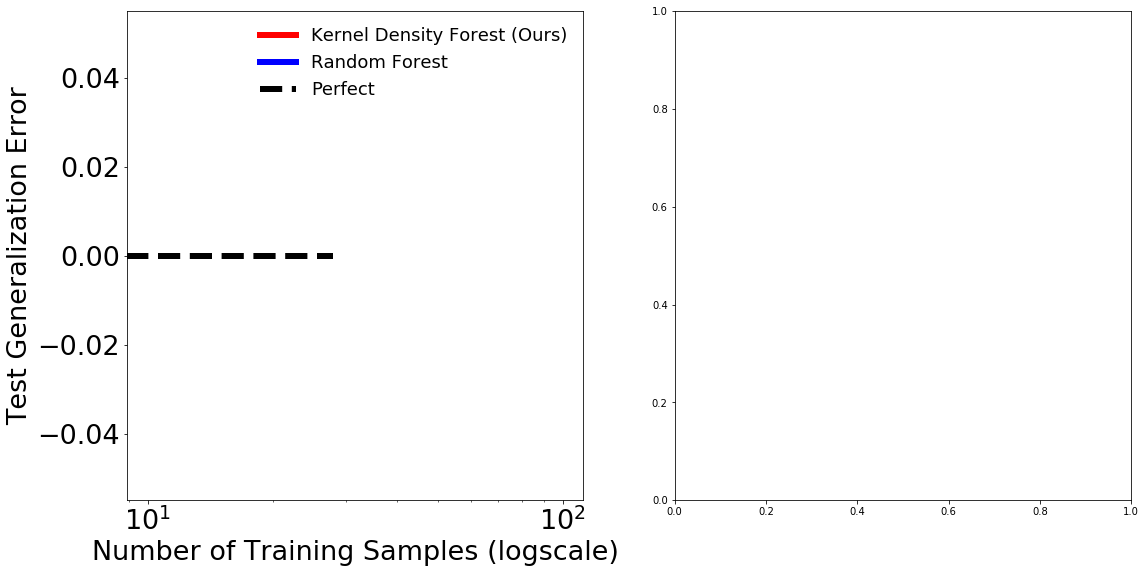

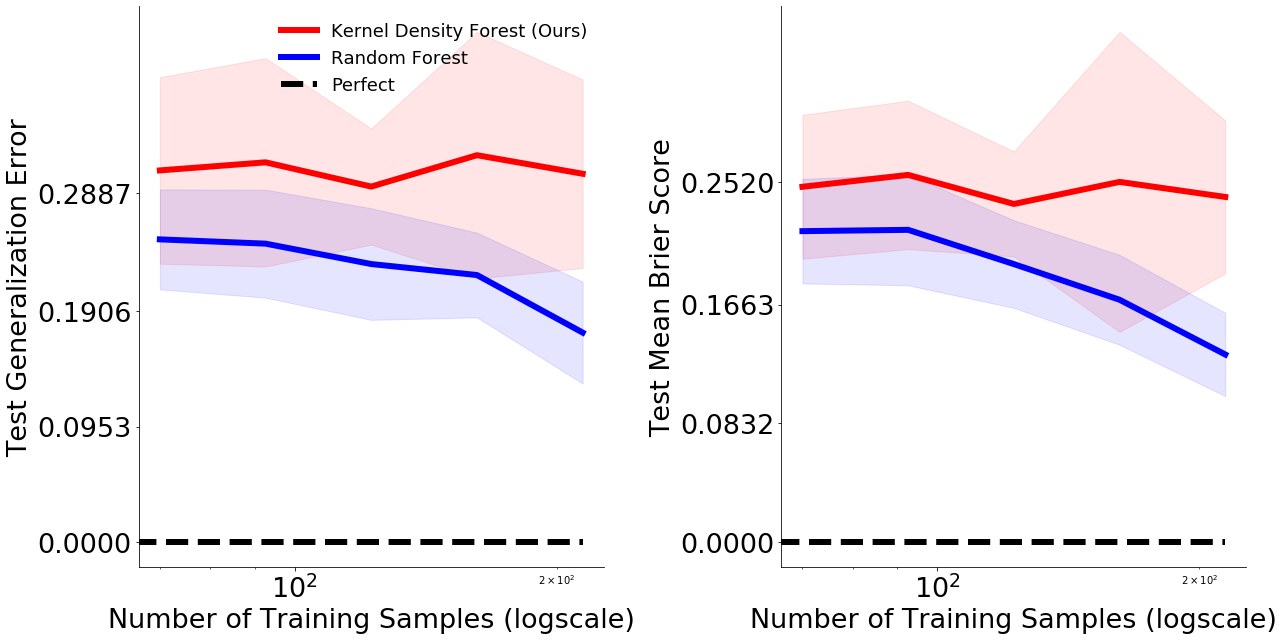

Dataset Num = 43
N = 4601
D = 57



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWa

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWa

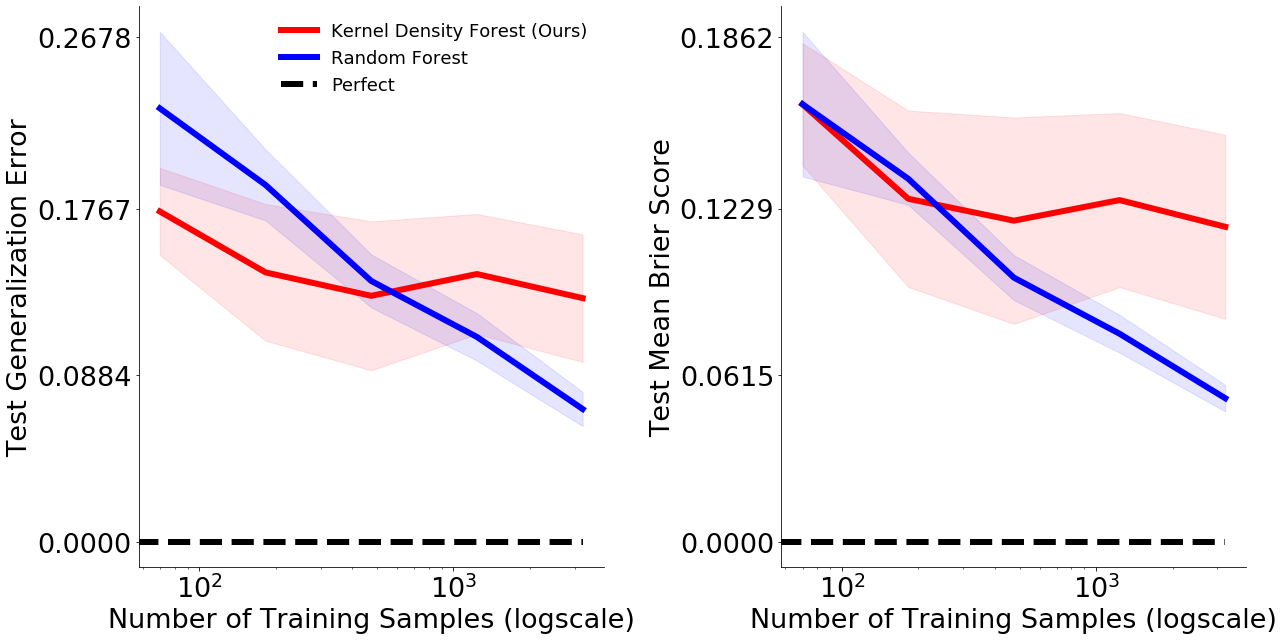

Skipping Dataset 44
Dataset Num = 45
N = 1535
D = 60



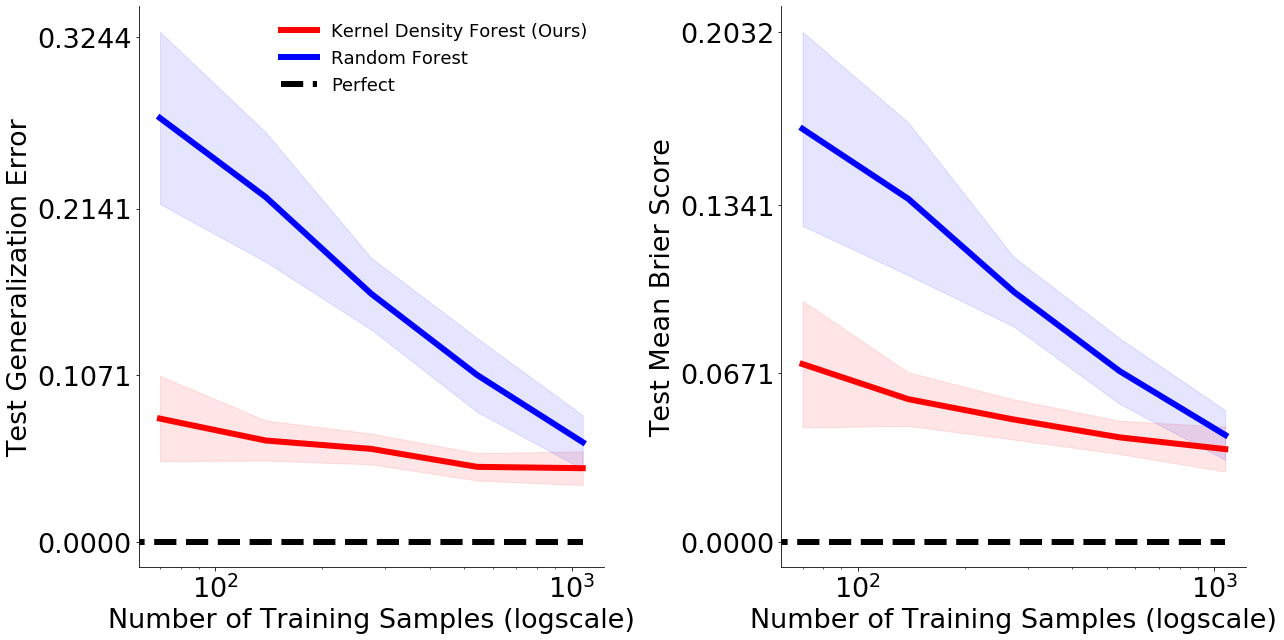

Skipping Dataset 46
Dataset Num = 47
N = 99
D = 5

Skipping Dataset 47
Dataset Num = 48
N = 303
D = 13



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in double_scalars


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho


Skipping Dataset 48
Dataset Num = 49
N = 958
D = 9



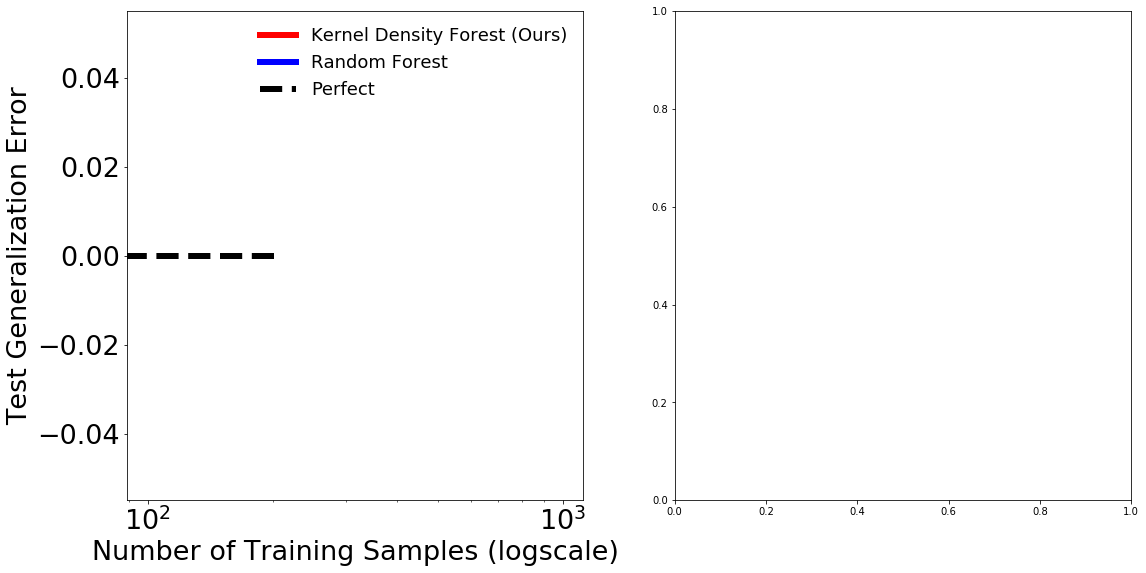

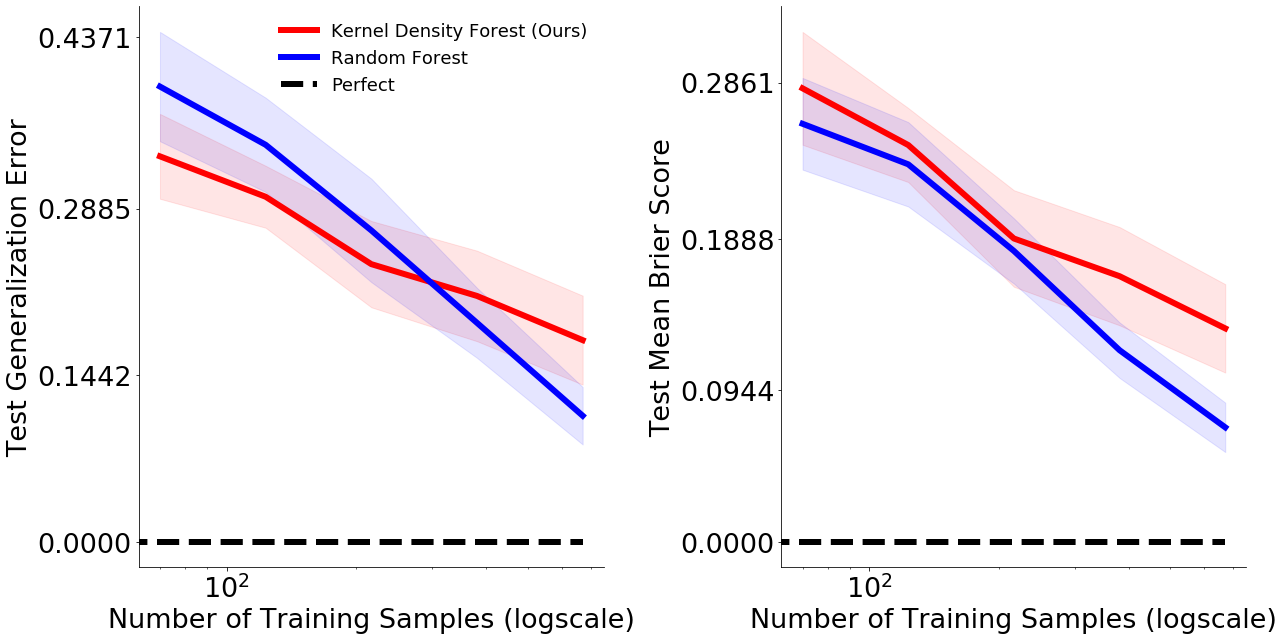

Dataset Num = 50
N = 294
D = 13




Skipping Dataset 50
Dataset Num = 51
N = 10
D = 32



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho


Skipping Dataset 51
Dataset Num = 52
N = 270
D = 13



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

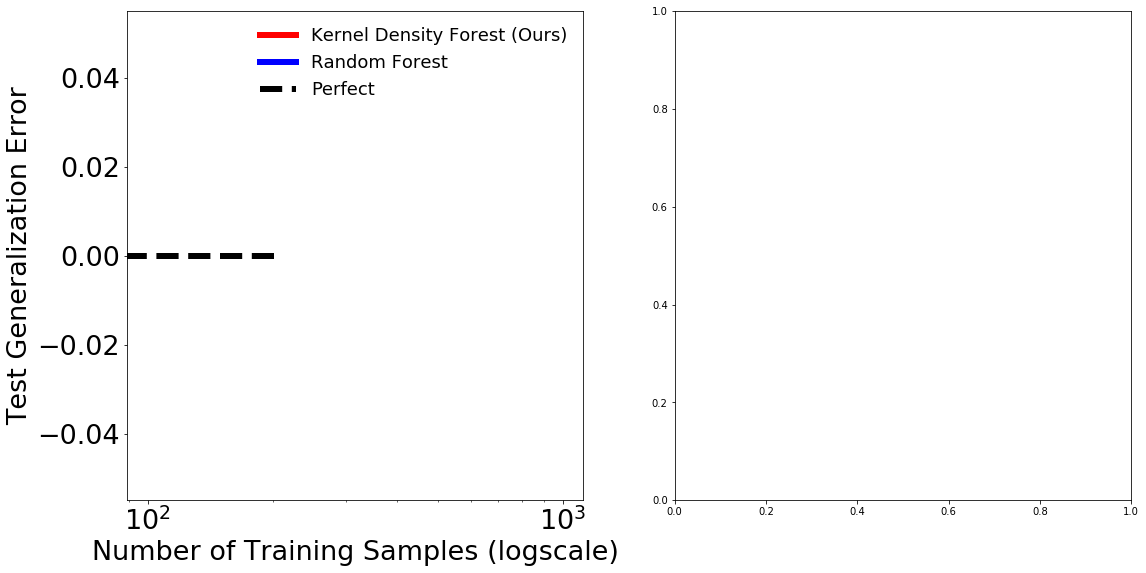

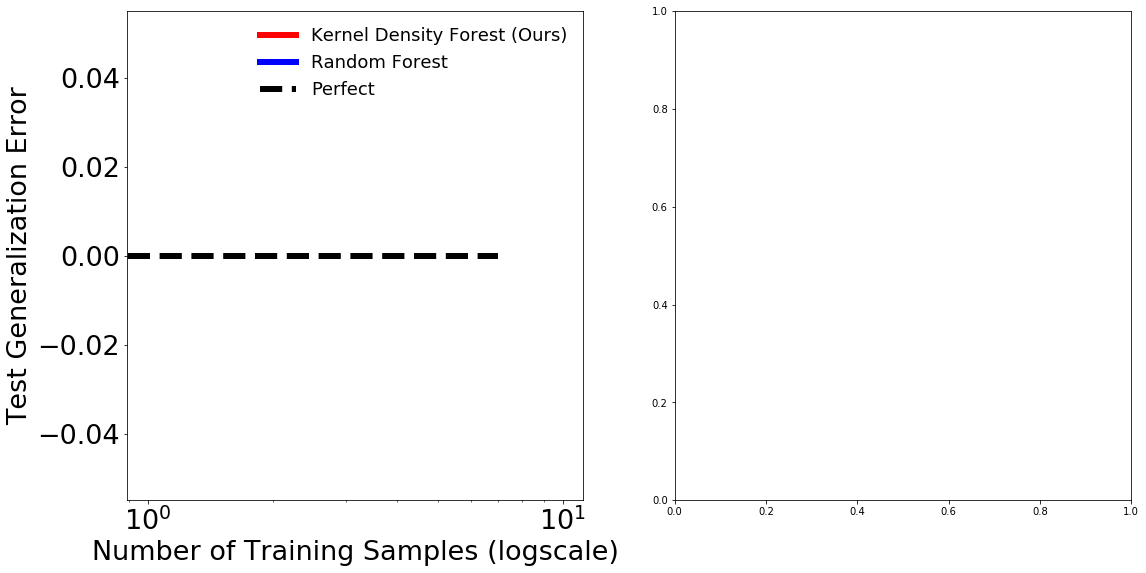

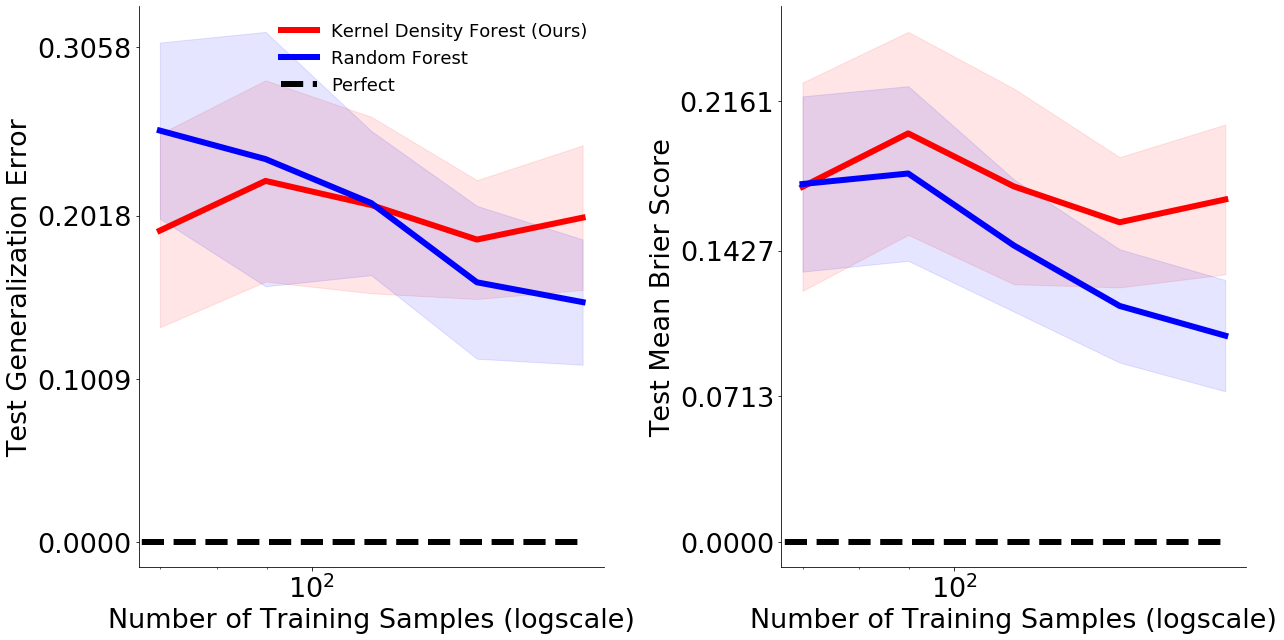

Dataset Num = 53
N = 429
D = 18



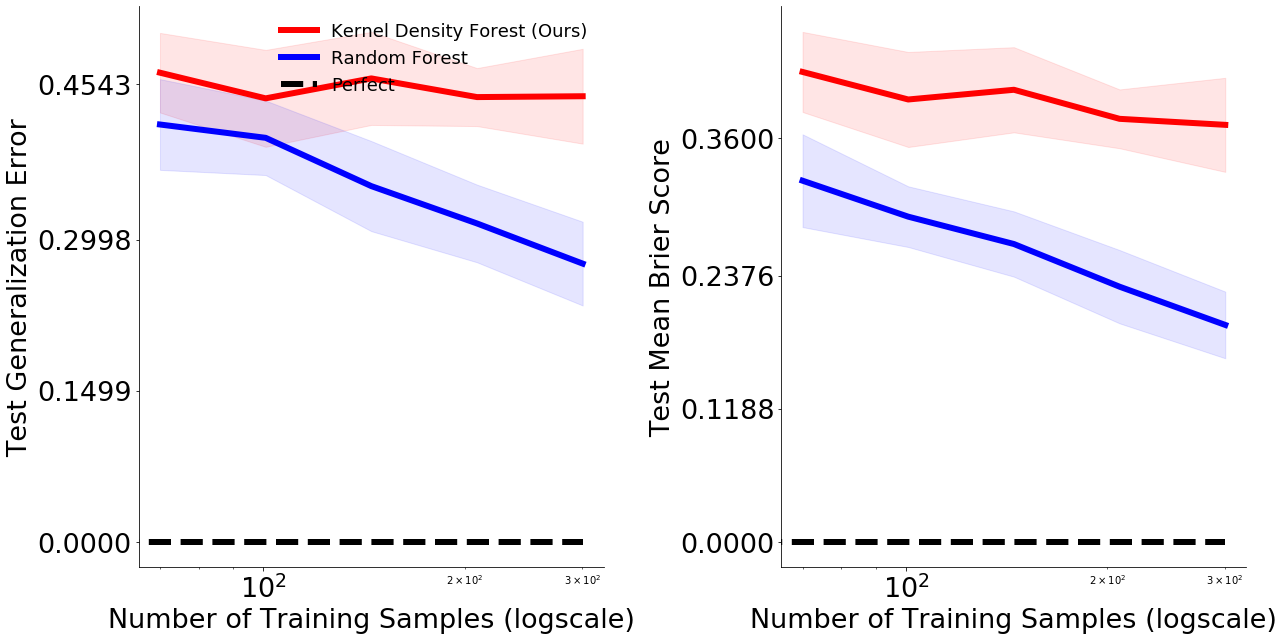

Dataset Num = 54
N = 155
D = 19




Skipping Dataset 54
Dataset Num = 55
N = 435
D = 16



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

Skipping Dataset 55
Skipping Dataset 56
Dataset Num = 57
N = 351
D = 34



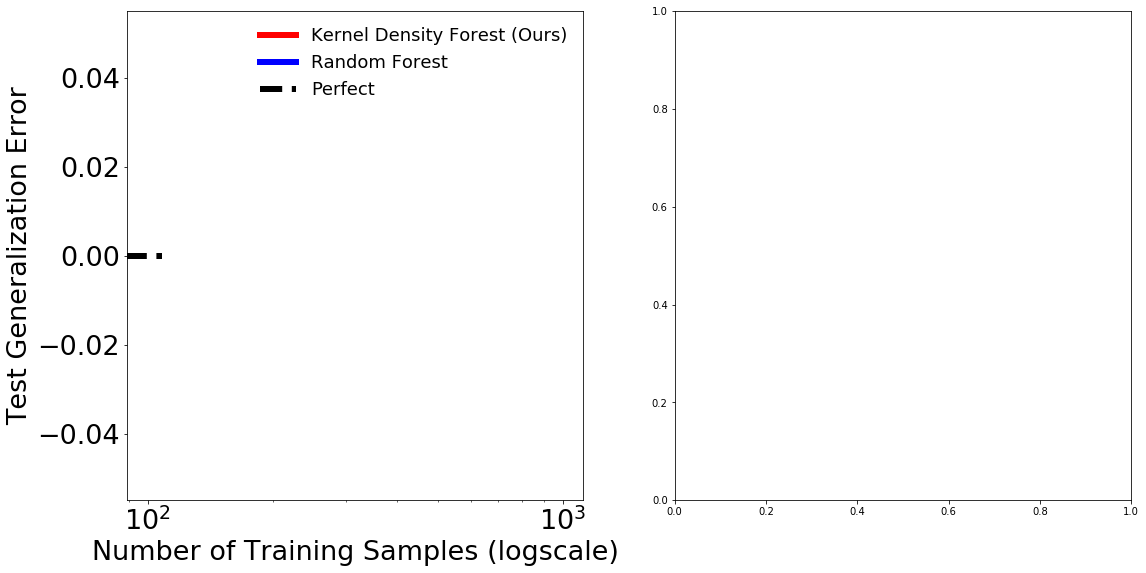

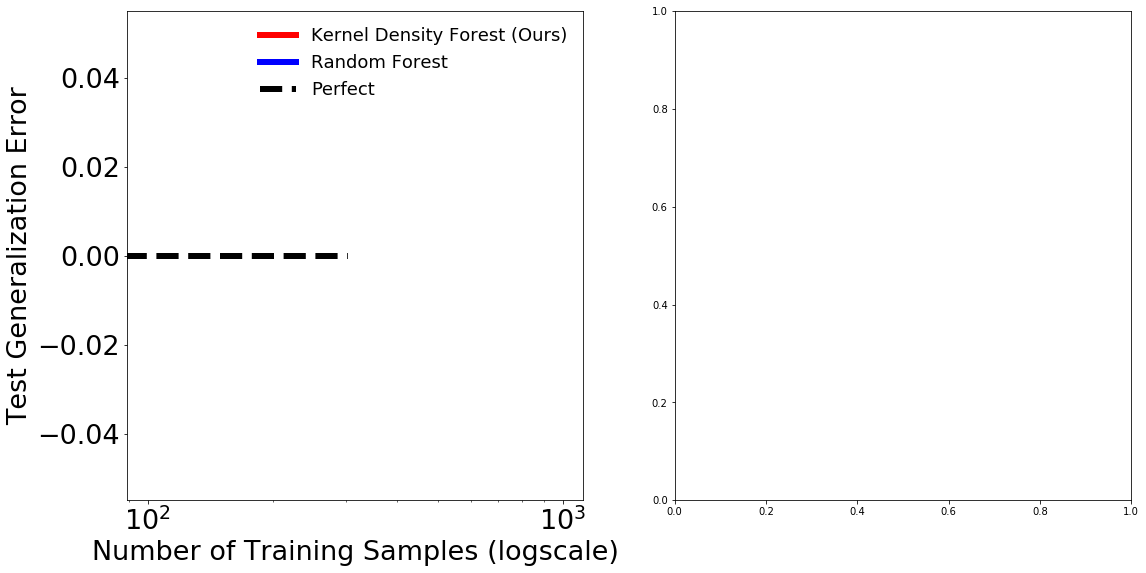

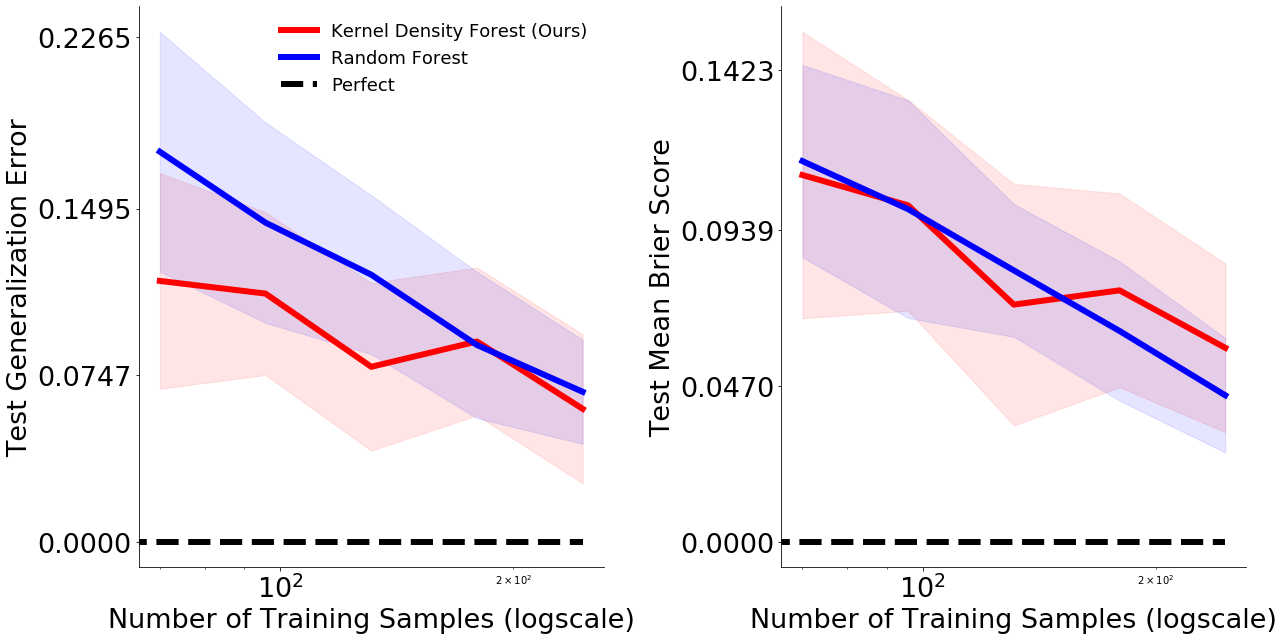

Dataset Num = 58
N = 3345
D = 40



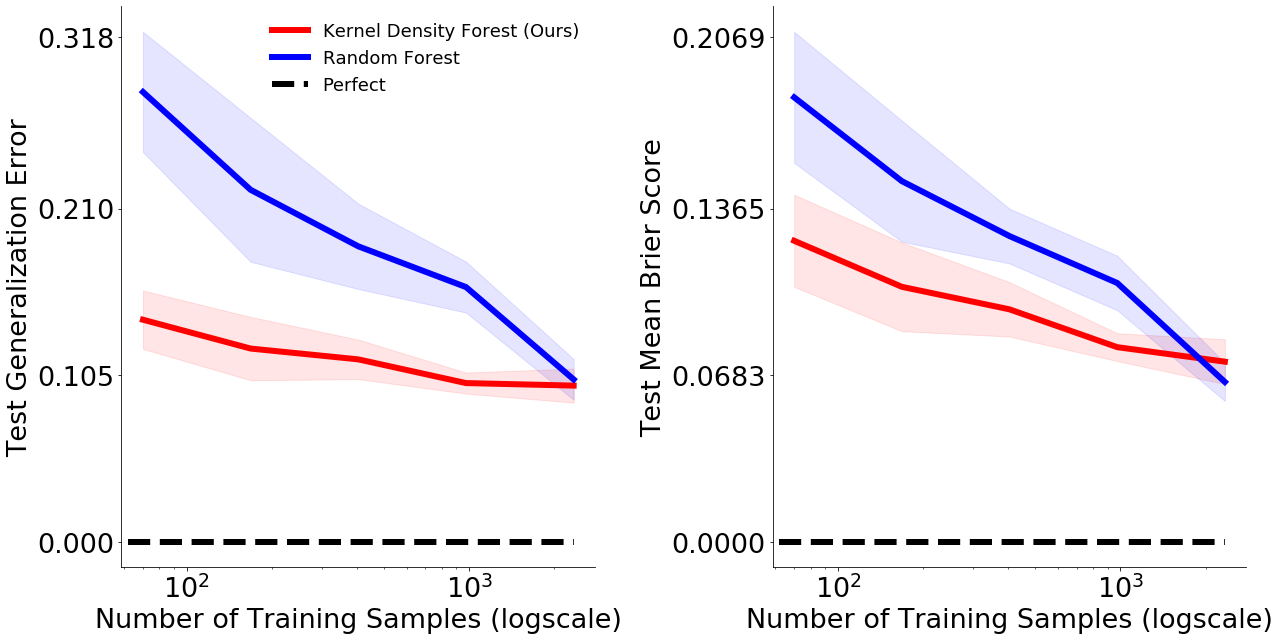

Dataset Num = 59
N = 100
D = 4

Skipping Dataset 59
Dataset Num = 60
N = 61
D = 16



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in double_scalars


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho


Skipping Dataset 60
Skipping Dataset 61
Dataset Num = 62
N = 107
D = 38



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho


Skipping Dataset 62
Dataset Num = 63
N = 3196
D = 36



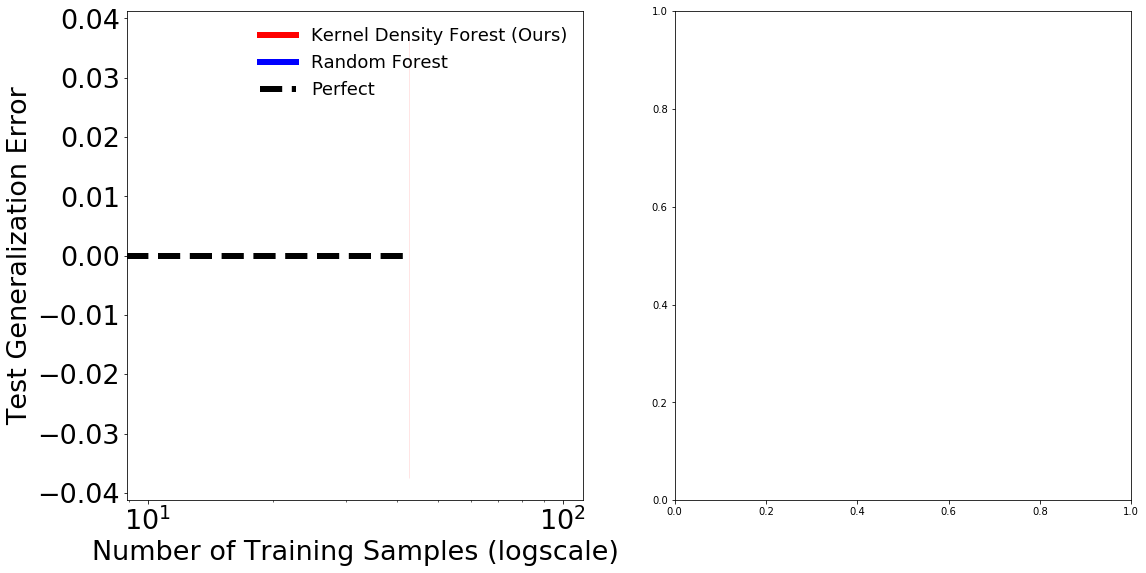

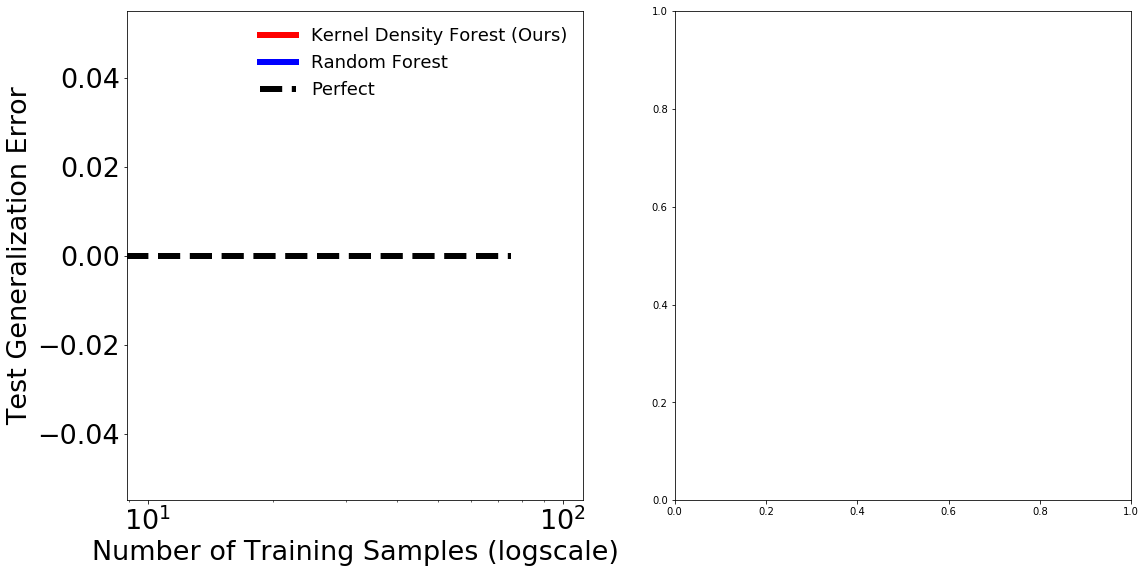

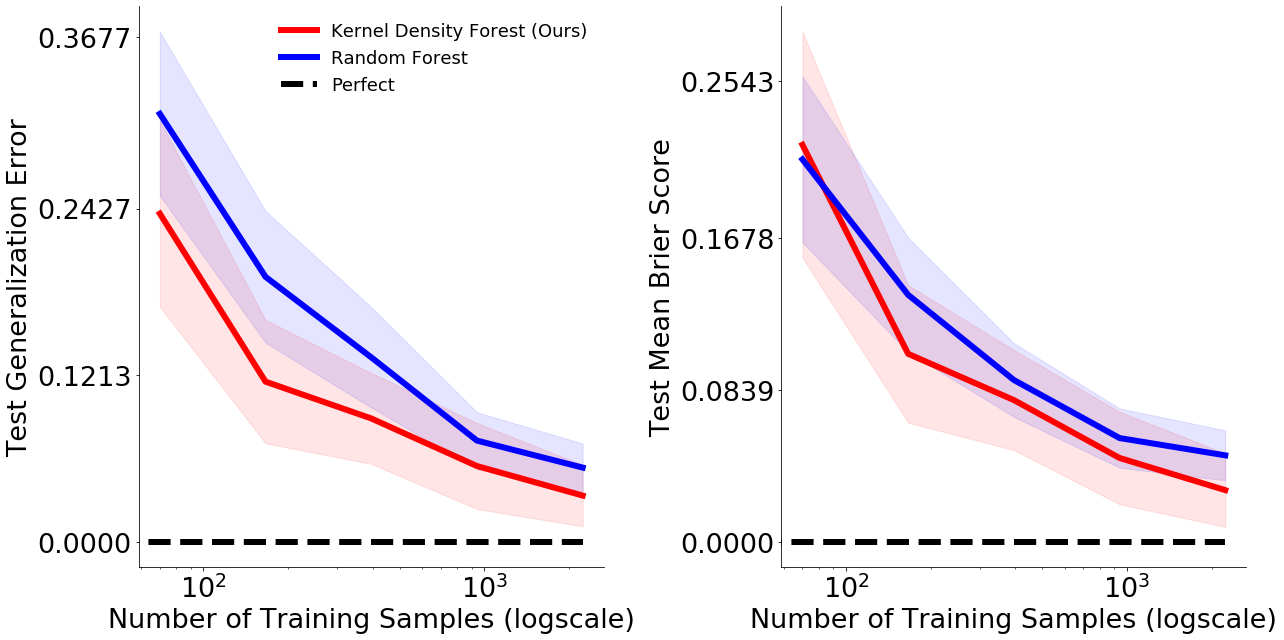

Dataset Num = 64
N = 57
D = 16




Skipping Dataset 64


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

Dataset Num = 65
N = 289
D = 279



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

Skipping Dataset 65
Dataset Num = 66
N = 2
D = 69




Skipping Dataset 66
Skipping Dataset 67
Dataset Num = 68
N = 3
D = 25



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho


Skipping Dataset 68
Dataset Num = 69
N = 83
D = 18



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/pytho


Skipping Dataset 69
Dataset Num = 70
N = 337
D = 4



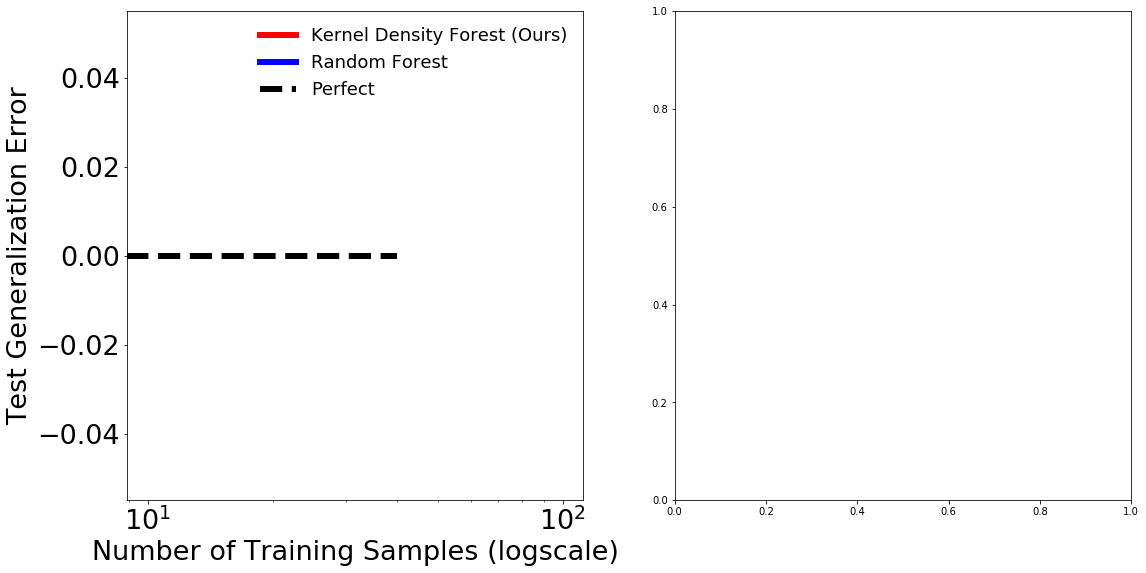

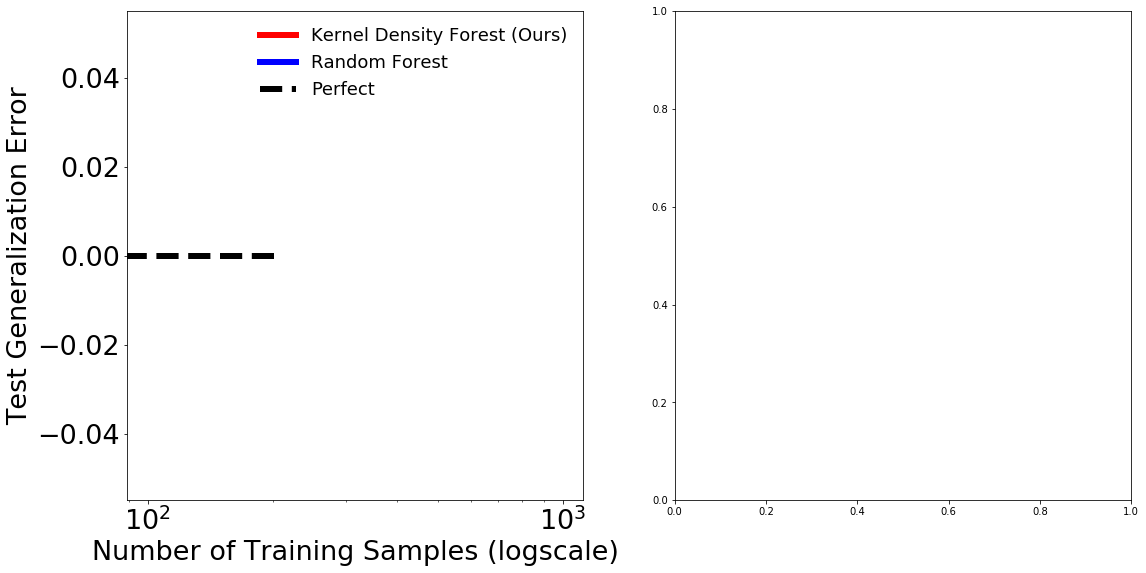

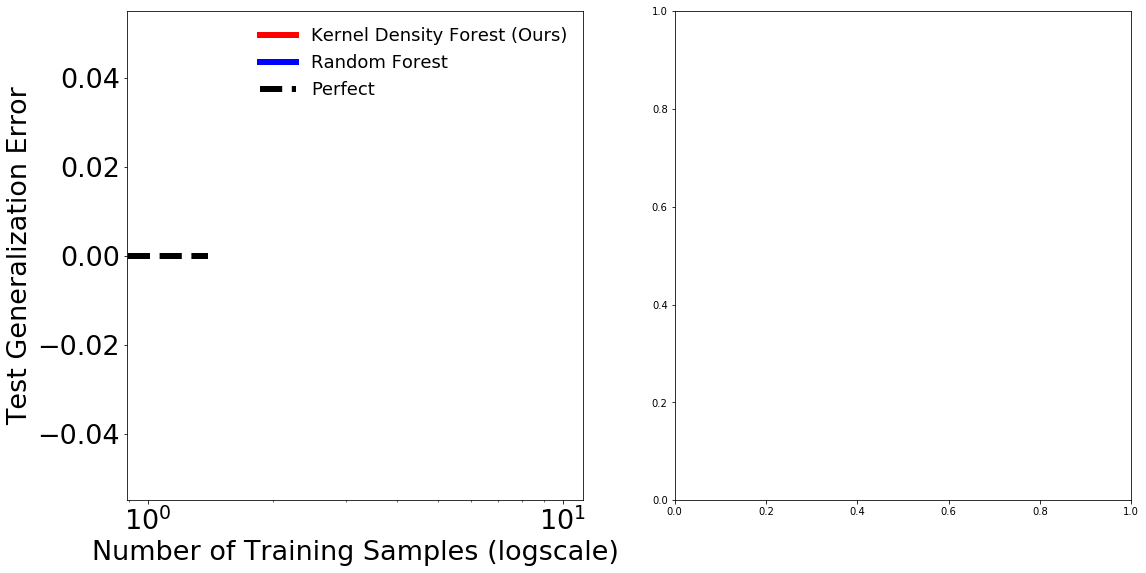

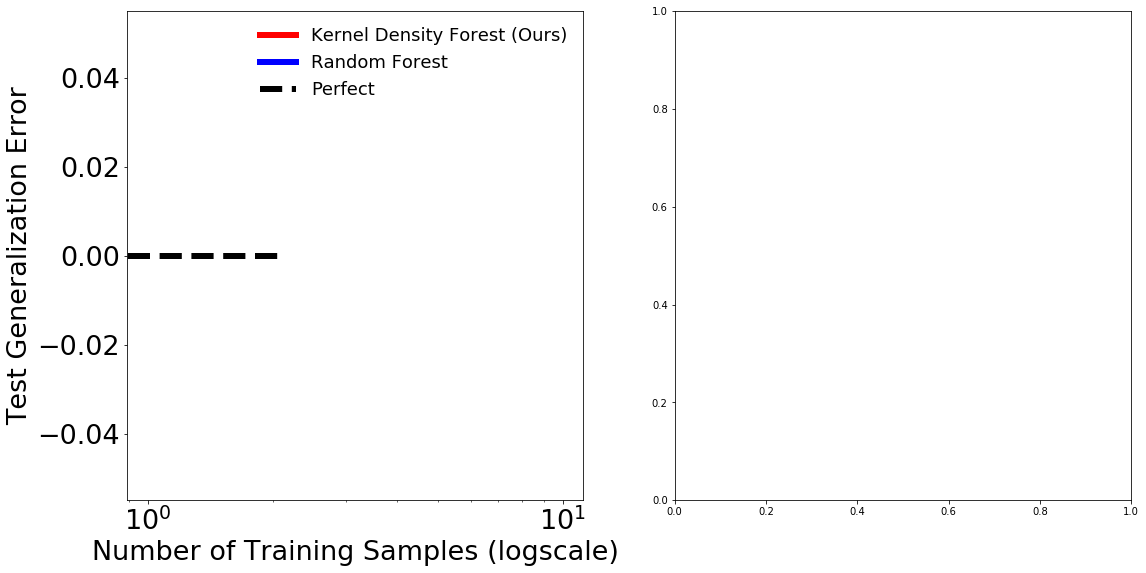

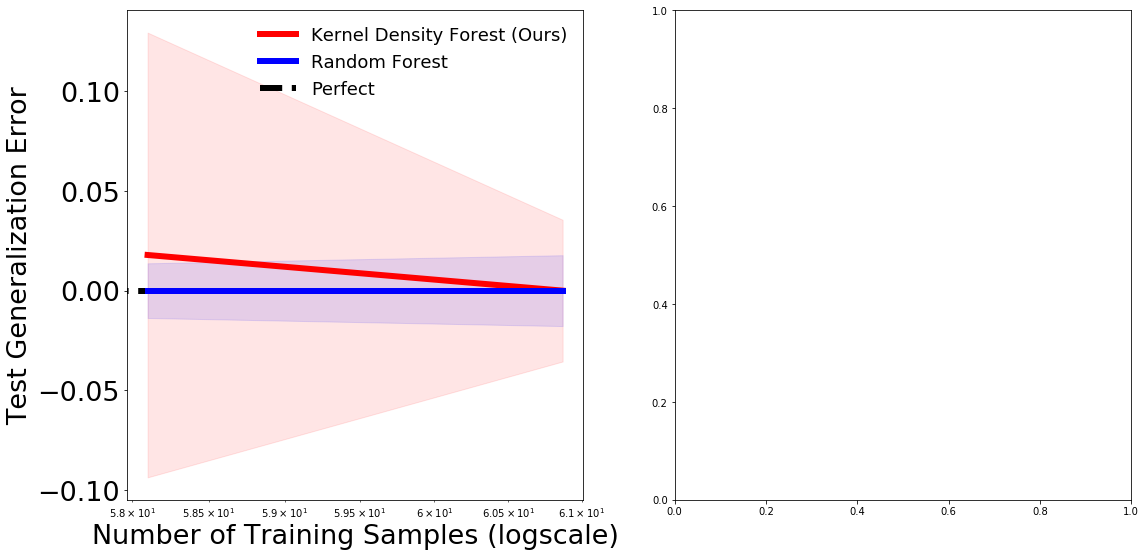

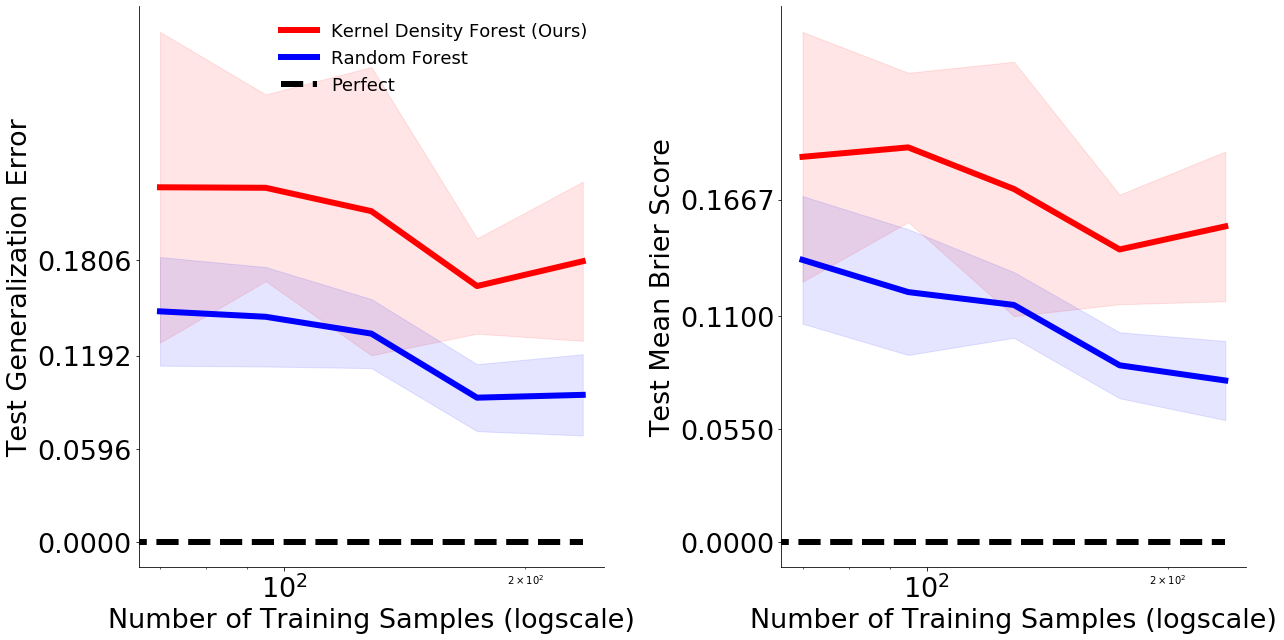

Dataset Num = 71
N = 400
D = 216



/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value e

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.loca

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_div

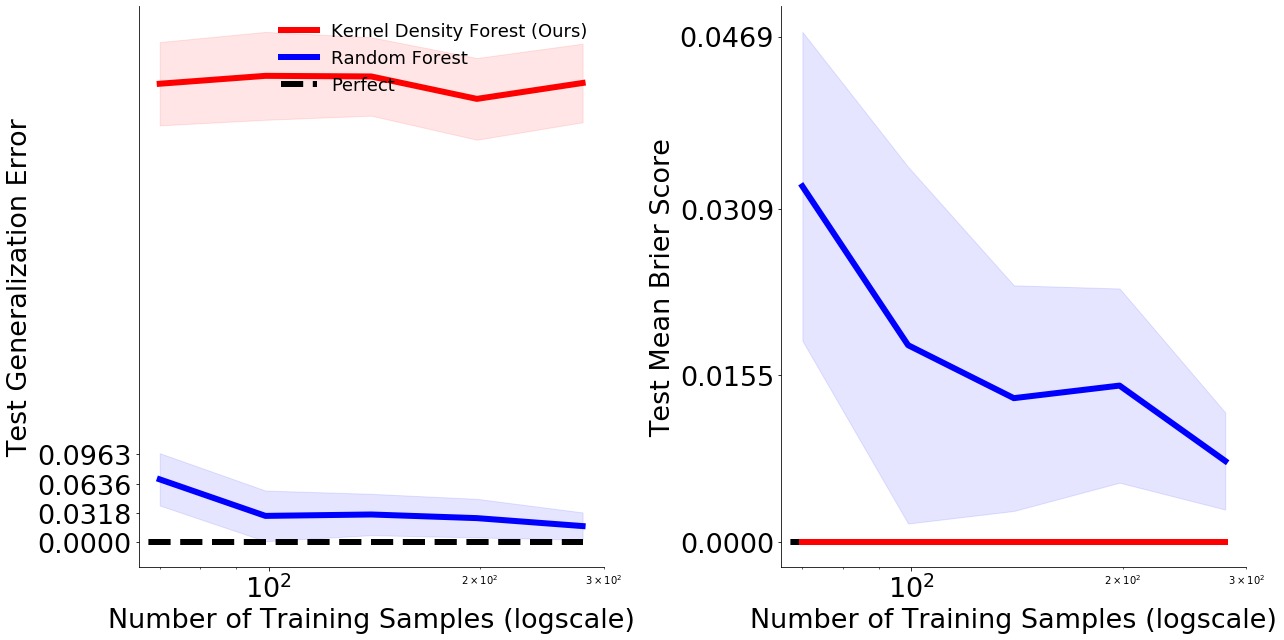

In [30]:
d_across_dataset_idx = []
n_across_dataset_idx = []
end_brier_ratio_across_dataset_idx = []
end_generalization_error_ratio_across_dataset_idx = []
for dataset_idx in range(72):
    try:
        X, y = openml.tasks.get_task(dataset_idx).get_X_and_y()
        X, y = X[np.where(y < 2)], y[np.where(y < 2)]
        print("Dataset Num = {}".format(dataset_idx))
        print("N = {}".format(len(X)))
        print("D = {}".format(np.shape(X)[1]))
        print()
        KDE_acc_means = []
        network_acc_means = []

        KDE_acc_stds = []
        network_acc_stds = []

        KDE_brier_means = []
        network_brier_means = []

        KDE_brier_stds = []
        network_brier_stds = []
        n_ra = np.logspace(2, np.log10(len(X)), num = 5, base = 10) * 0.7
        ticks = np.arange(np.min(n_ra), np.max(n_ra), step = int((np.max(n_ra) - np.min(n_ra)) // 4))
        ticks_ra = np.array([int(str(tick)[:1]) * 10 ** int(np.log10(tick)) for tick in ticks])
        for n in tqdm(n_ra):
            KDE_accs_across_trials = []
            network_accs_across_trials = []
            KDE_briers_across_trials = []
            network_briers_across_trials = []
            for trial_idx in range(num_trials):
                try:
                    X_train, X_test, y_train, y_test = train_test_split(X, y)
                    KDE_y_proba = get_KDE_y_proba(X_train, y_train, n, X_test)
                    network_y_proba = get_network_y_proba(X, y, n, X_test)

                    KDE_accs_across_trials.append(np.nanmean(np.argmax(KDE_y_proba, axis = 1) == y_test))
                    network_accs_across_trials.append(np.nanmean(np.argmax(network_y_proba, axis = 1) == y_test))

                    KDE_briers_across_trials.append(get_brier(KDE_y_proba, y_test))
                    network_briers_across_trials.append(get_brier(network_y_proba, y_test))
                except:
                    pass
            
            KDE_acc_means.append(clipped_mean(KDE_accs_across_trials))
            network_acc_means.append(clipped_mean(network_accs_across_trials))

            KDE_brier_means.append(clipped_mean(KDE_briers_across_trials))
            network_brier_means.append(clipped_mean(network_briers_across_trials))

            KDE_acc_stds.append(np.std(KDE_accs_across_trials))
            network_acc_stds.append(np.std(network_accs_across_trials))

            KDE_brier_stds.append(np.std(KDE_briers_across_trials))
            network_brier_stds.append(np.std(network_briers_across_trials))

            n_across_dataset_idx.append(np.shape(X)[0])
            d_across_dataset_idx.append(np.shape(X)[1])
            end_brier_ratio_across_dataset_idx.append(network_brier_means[-1] / KDE_brier_means[-1])
            end_generalization_error_ratio_across_dataset_idx.append((1 - network_acc_means[-1]) / (1 - KDE_acc_means[-1]))

        figs, ax = plt.subplots(1, 2, figsize = (18, 9))
        figs.set_facecolor("white")

        ax[0].tick_params(axis='both', which='major', labelsize=27)
        ax[0].plot(n_ra[:len(KDE_acc_means)] , 1 - np.array(KDE_acc_means), label = "Kernel Density Forest (Ours)", c = "red")
        ax[0].plot(n_ra[:len(KDE_acc_means)], 1 - np.array(network_acc_means), label = "Random Forest", c = "blue")
        ax[0].hlines(0.0, 0, n_ra[len(KDE_acc_means) - 1], linestyle = "dashed", label = "Perfect", color = "black")
        ax[0].legend(fontsize = 18, loc = "upper right", frameon = False)
        ax[0].set_xlabel("Number of Training Samples (logscale)", fontsize = 27)
        ax[0].set_ylabel("Test Generalization Error", fontsize = 27)
        ax[0].set_xscale("log")
        ax[0].fill_between(n_ra[:len(KDE_acc_means)], 
                       1 - np.array(KDE_acc_means) - np.array(KDE_acc_stds),
                       1 - np.array(KDE_acc_means) + np.array(KDE_acc_stds),
                       alpha = .1,
                       color = "red")
        ax[0].fill_between(n_ra[:len(KDE_acc_means)], 
                       1 - np.array(network_acc_means) - np.array(network_acc_stds),
                       1 - np.array(network_acc_means) + np.array(network_acc_stds),
                       alpha = .1,
                       color = "blue")
        yticks_range = np.arange(0, 1 - network_acc_means[0] + network_acc_stds[0], (1 - network_acc_means[0] + network_acc_stds[0]) / 100)
        ax[0].set_yticks([round(np.percentile(yticks_range, p), 4) for p in [0, 33, 66, 100]])
        for side in {"right", "top"}:
                ax[0].spines[side].set_visible(False)

        ax[1].tick_params(axis='both', which='major', labelsize=27)
        ax[1].plot(n_ra[:len(KDE_acc_means)] , KDE_brier_means, c = "red")
        ax[1].plot(n_ra[:len(KDE_acc_means)], network_brier_means, c = "blue")
        ax[1].hlines(0.0, 0, n_ra[len(KDE_acc_means) - 1], linestyle = "dashed", color = "black")
        ax[1].set_xlabel("Number of Training Samples (logscale)", fontsize = 27)
        ax[1].set_ylabel("Test Mean Brier Score", fontsize = 27)
        ax[1].set_xscale("log")
        ax[1].fill_between(n_ra[:len(KDE_brier_means)], 
                   np.array(KDE_brier_means) - np.array(KDE_brier_stds),
                   np.array(KDE_brier_means) + np.array(KDE_brier_stds),
                   alpha = .1,
                   color = "red")
        ax[1].fill_between(n_ra[:len(KDE_brier_means)], 
                       np.array(network_brier_means) - np.array(network_brier_stds),
                       np.array(network_brier_means) + np.array(network_brier_stds),
                       alpha = .1,
                       color = "blue")
        yticks_range = np.arange(0, network_brier_means[0] + network_brier_stds[0], (network_brier_means[0] + network_brier_stds[0]) / 100)
        ax[1].set_yticks([round(np.percentile(yticks_range, p), 4) for p in [0, 33, 66, 100]])
        for side in {"right", "top"}:
                ax[1].spines[side].set_visible(False)

        figs.tight_layout()

        plt.show()
        

    except:
        print("Skipping Dataset {}".format(dataset_idx))


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater


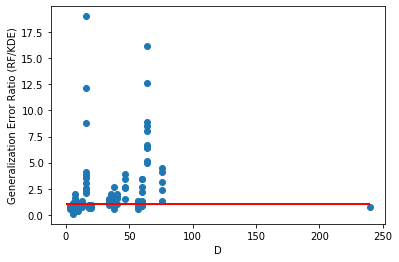

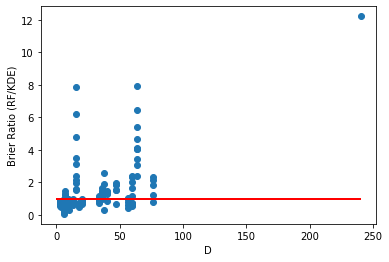

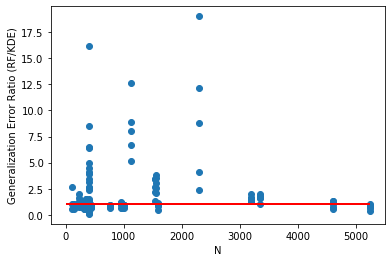

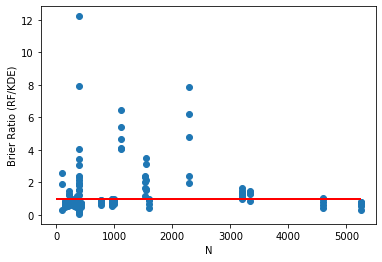

In [41]:
d_across_dataset_idx = np.array(d_across_dataset_idx)
n_across_dataset_idx = np.array(n_across_dataset_idx)
end_brier_ratio_across_dataset_idx = np.array(end_brier_ratio_across_dataset_idx)
end_generalization_error_ratio_across_dataset_idx = np.array(end_generalization_error_ratio_across_dataset_idx)

finite_idxs = np.where(~np.isnan(end_generalization_error_ratio_across_dataset_idx) & ~np.isinf(end_generalization_error_ratio_across_dataset_idx) & (end_generalization_error_ratio_across_dataset_idx < 1e3) & (end_generalization_error_ratio_across_dataset_idx > 0) & ~np.isnan(end_brier_ratio_across_dataset_idx) & ~np.isinf(end_brier_ratio_across_dataset_idx) & (end_brier_ratio_across_dataset_idx < 1e3) & (end_brier_ratio_across_dataset_idx > 0))[0]
plt.scatter(d_across_dataset_idx[finite_idxs], end_generalization_error_ratio_across_dataset_idx[finite_idxs])
plt.hlines(1, xmin = 0, xmax = np.max(d_across_dataset_idx[finite_idxs]), lw = 2, color = "red")
plt.xlabel("D")
plt.ylabel("Generalization Error Ratio (RF/KDE)")
plt.show()

plt.scatter(d_across_dataset_idx[finite_idxs], end_brier_ratio_across_dataset_idx[finite_idxs])
plt.hlines(1, xmin = 0, xmax = np.max(d_across_dataset_idx[finite_idxs]), lw = 2, color = "red")
plt.xlabel("D")
plt.ylabel("Brier Ratio (RF/KDE)")
plt.show()

plt.scatter(n_across_dataset_idx[finite_idxs], end_generalization_error_ratio_across_dataset_idx[finite_idxs])
plt.hlines(1, xmin = 0, xmax = np.max(n_across_dataset_idx[finite_idxs]), lw = 2, color = "red")
plt.xlabel("N")
plt.ylabel("Generalization Error Ratio (RF/KDE)")
plt.show()

plt.scatter(n_across_dataset_idx[finite_idxs], end_brier_ratio_across_dataset_idx[finite_idxs])
plt.hlines(1, xmin = 0, xmax = np.max(n_across_dataset_idx[finite_idxs]), lw = 2, color = "red")
plt.xlabel("N")
plt.ylabel("Brier Ratio (RF/KDE)")
plt.show()

(array([ 2.,  3.,  2.,  8., 19., 18., 19., 14.,  4.,  5.,  4.,  8.,  2.,
         1.,  2.,  3.,  2.,  1.,  2.,  3.,  1.,  0.,  0.,  0.,  2.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.08086098,  0.20209711,  0.32333323,  0.44456936,  0.56580549,
         0.68704161,  0.80827774,  0.92951387,  1.05074999,  1.17198612,
         1.29322225,  1.41445837,  1.5356945 ,  1.65693063,  1.77816675,
         1.89940288,  2.02063901,  2.14187513,  2.26311126,  2.38434739,
         2.50558351,  2.62681964,  2.74805576,  2.86929189,  2.99052802,
         3.11176414,  3.23300027,  3.3542364 ,  3.47547252,  3.596708

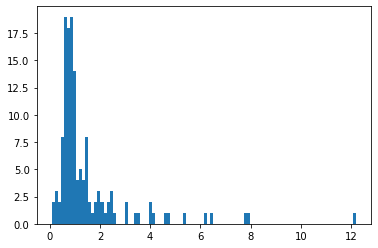

In [43]:
plt.hist(end_brier_ratio_across_dataset_idx[finite_idxs], bins = 100)